## Time series

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")
#from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM

In [ ]:
df_time = pd.read_csv('https://raw.githubusercontent.com/nishusingh11/Captstone_Project/main/Data/US_Data.csv', index_col='Date',parse_dates=True)

# preprocess data
df_time = pd.DataFrame(df_time.groupby(['Date'])['Time'].count())
df_time = df_time.rename(columns={'Time':'Count'})
df_time = df_time.resample('D').sum() # resample to daily frequency
df_time.head()

,Count
Date,
2000-01-01,9
2000-01-02,6
2000-01-03,12
2000-01-04,6
2000-01-05,9


In [ ]:
train = df_time[df_time.index < '2020-01-01']
test = df_time[df_time.index >= '2020-01-01']

In [ ]:
df_time.index.min(), df_time.index.max()

(Timestamp('2000-01-01 00:00:00', freq='D'),
 Timestamp('2023-02-27 00:00:00', freq='D'))

In [ ]:

result = adfuller(df_time['Count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.840028
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


ARIMA(0, 0, 0) ,  RMSE=11.884


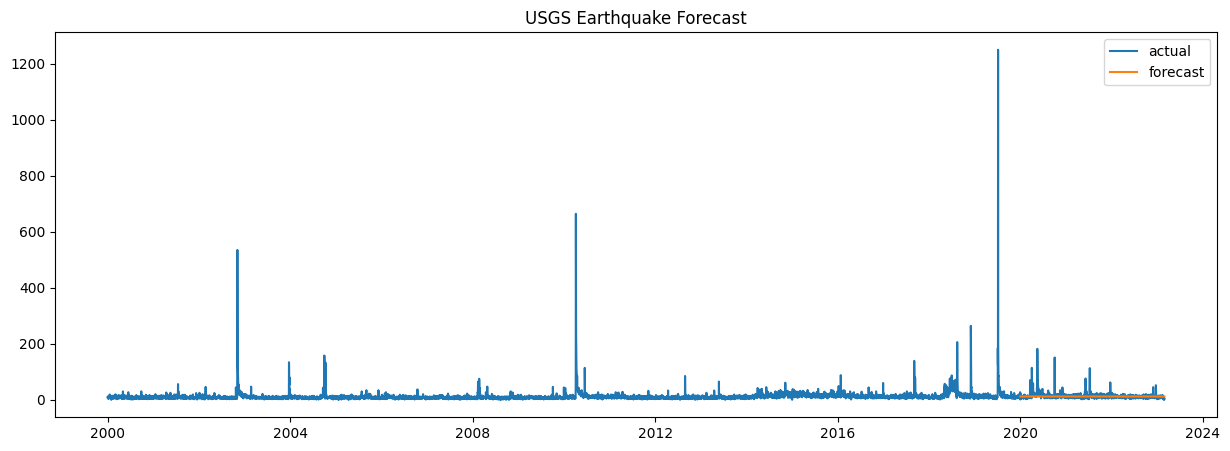

ARIMA(0, 0, 1) ,  RMSE=11.885


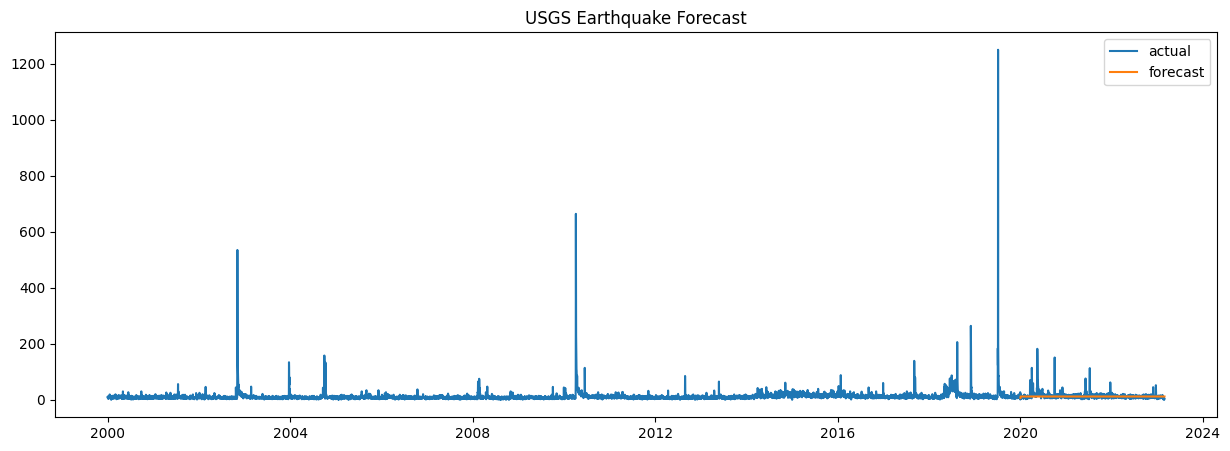

ARIMA(0, 0, 2) ,  RMSE=11.883


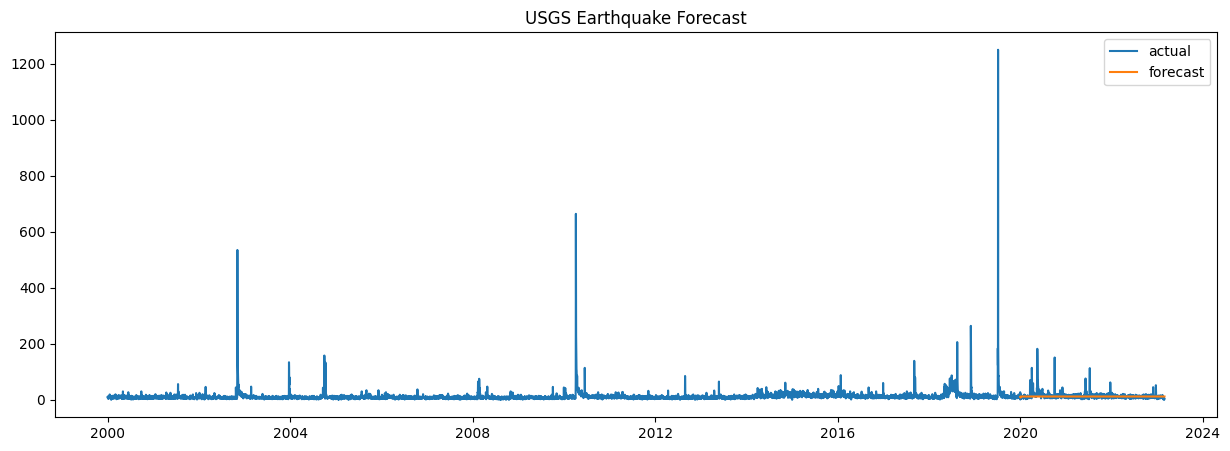

ARIMA(0, 1, 0) ,  RMSE=17.148


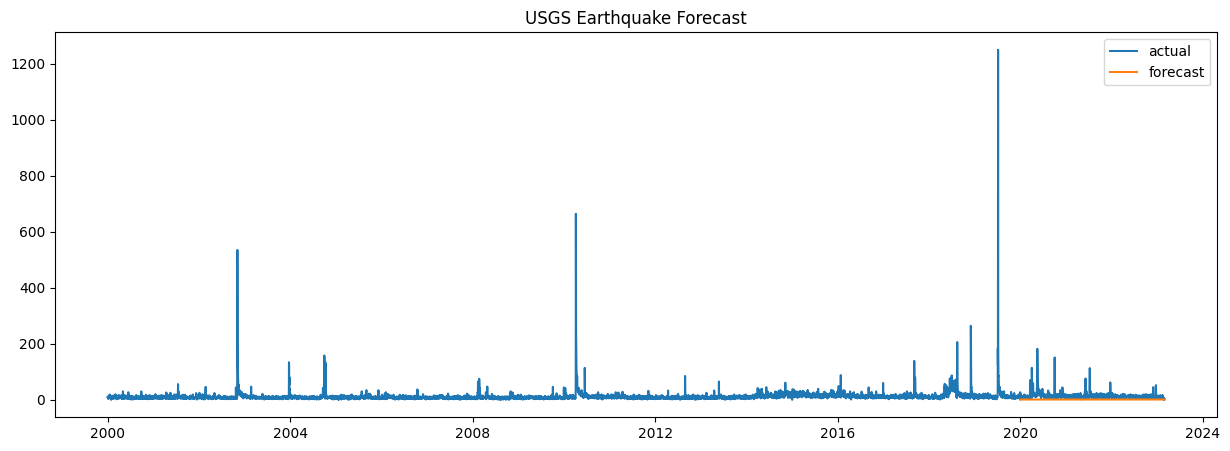

ARIMA(0, 1, 1) ,  RMSE=12.161


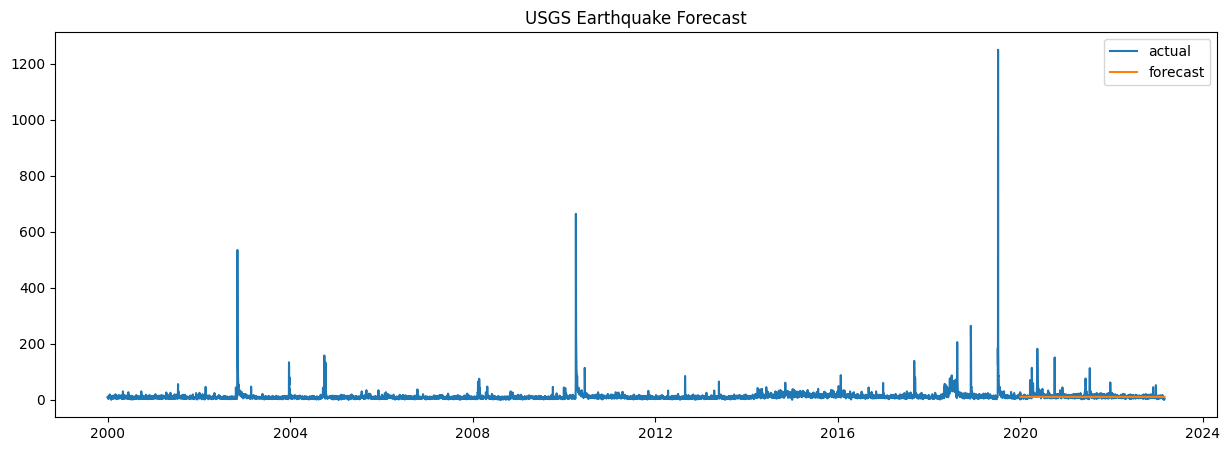

ARIMA(0, 1, 2) ,  RMSE=12.135


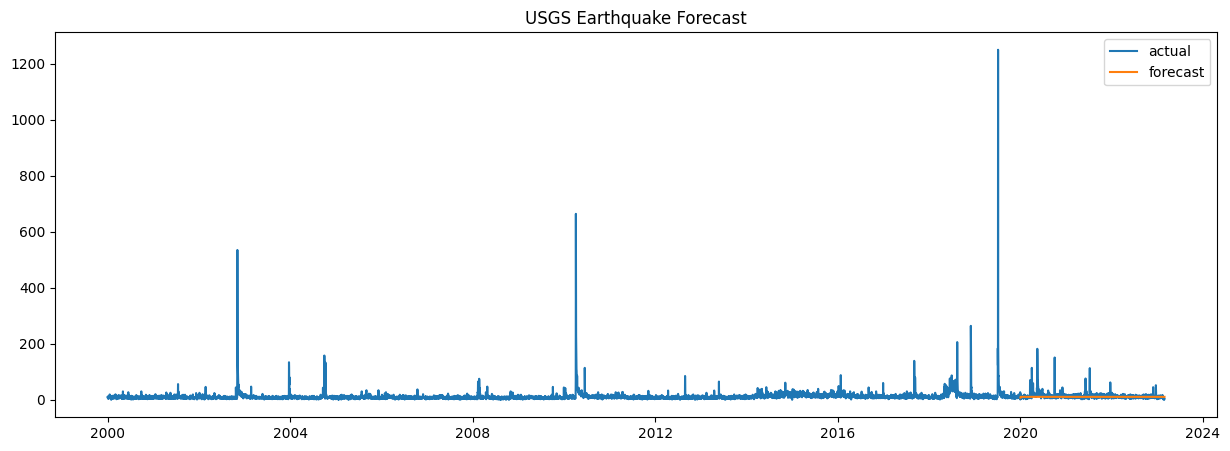

ARIMA(0, 2, 0) ,  RMSE=17343.762


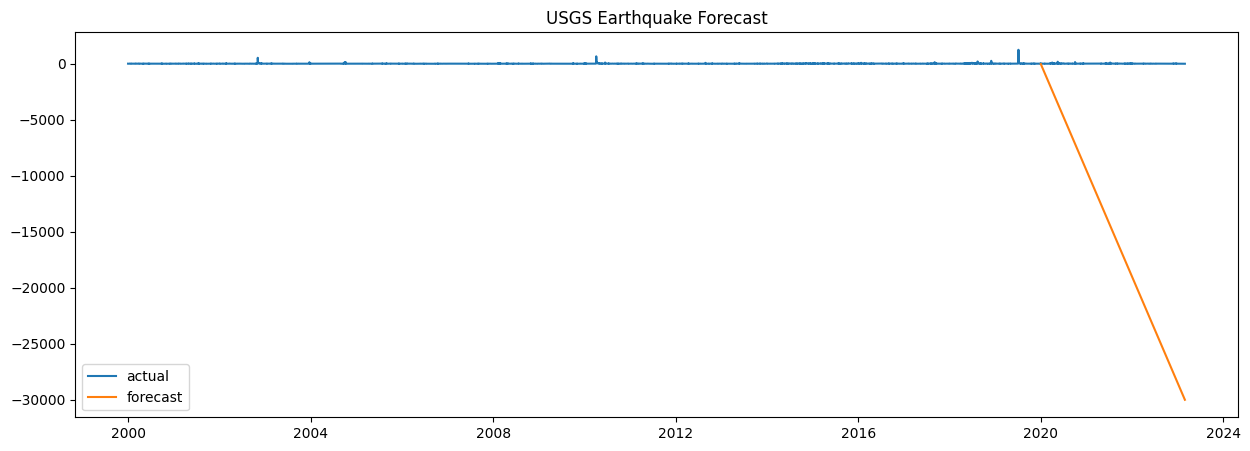

ARIMA(0, 2, 1) ,  RMSE=17.884


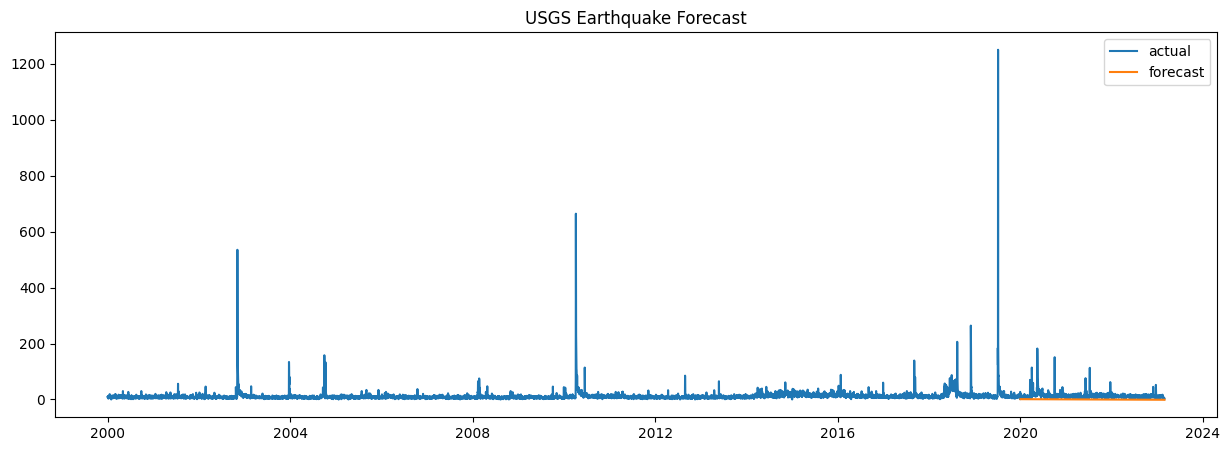

ARIMA(0, 2, 2) ,  RMSE=12.161


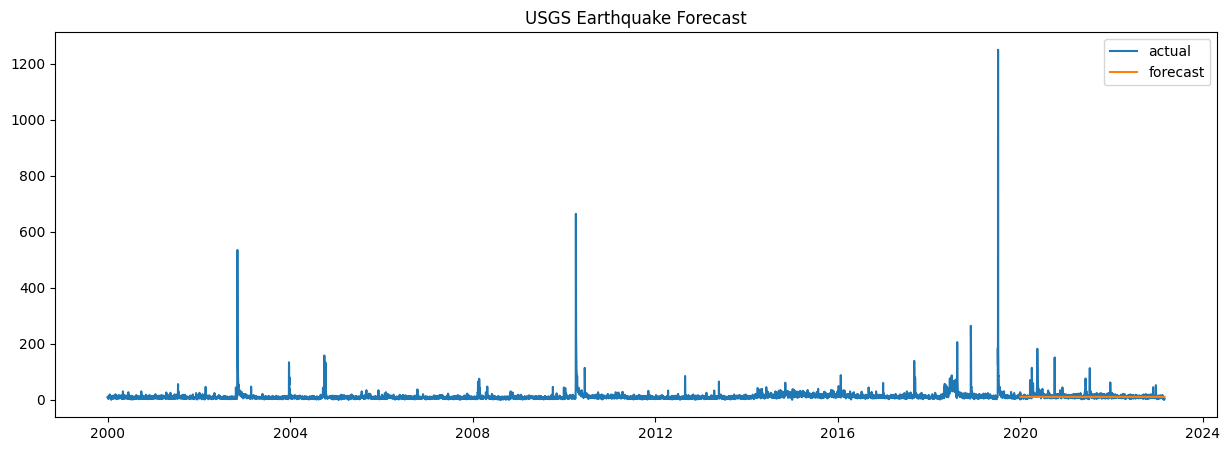

ARIMA(1, 0, 0) ,  RMSE=11.884


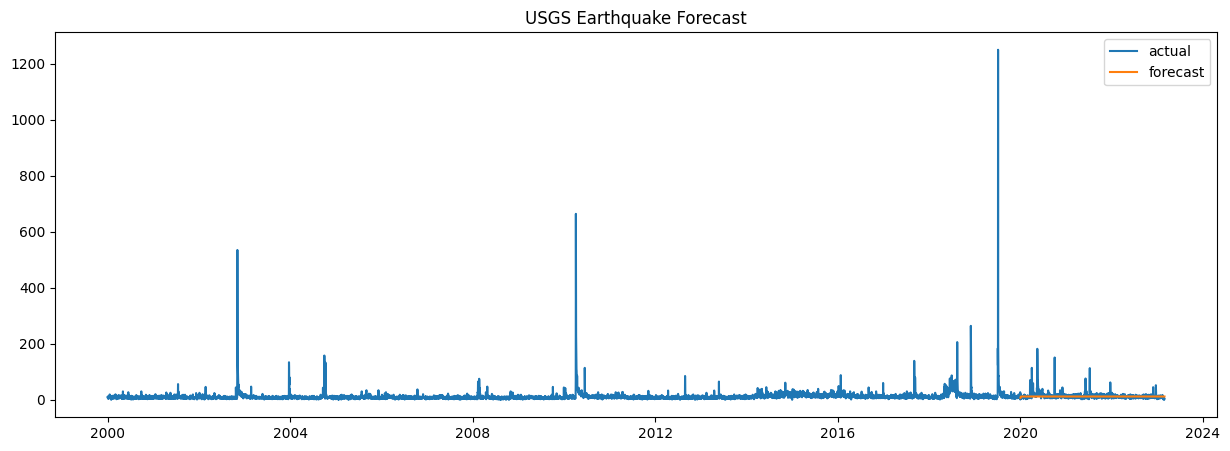

ARIMA(1, 0, 1) ,  RMSE=11.883


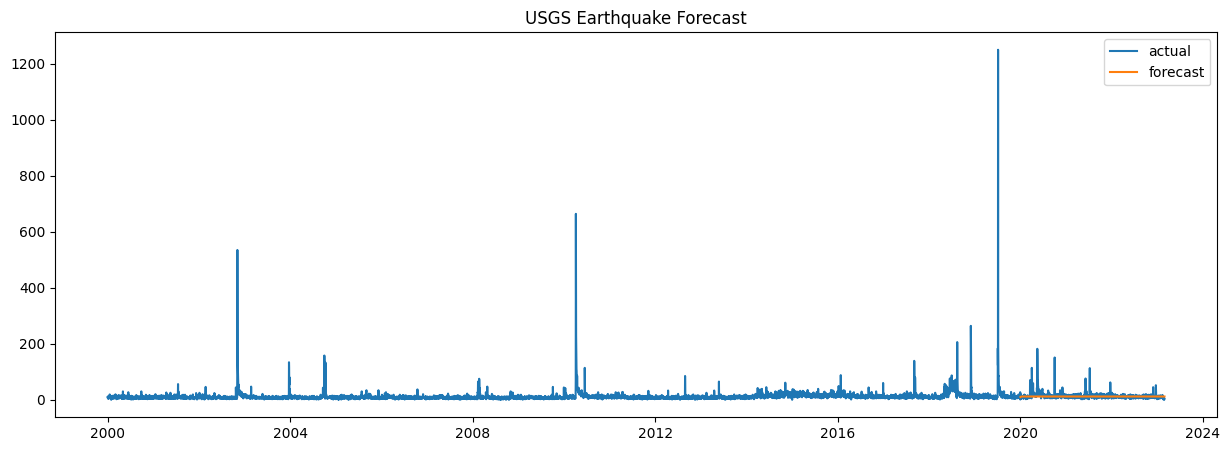

ARIMA(1, 0, 2) ,  RMSE=11.883


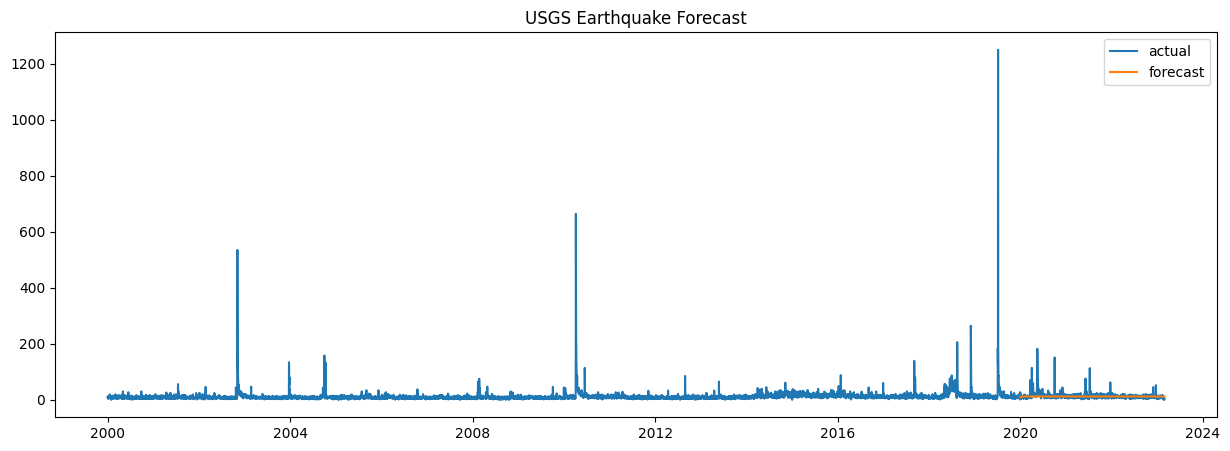

ARIMA(1, 1, 0) ,  RMSE=12.780


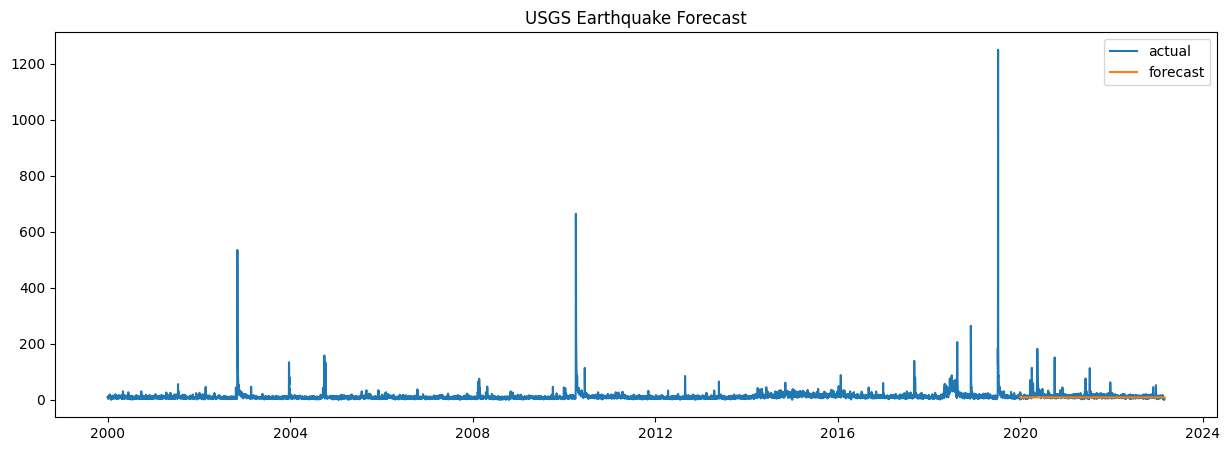

ARIMA(1, 1, 1) ,  RMSE=12.068


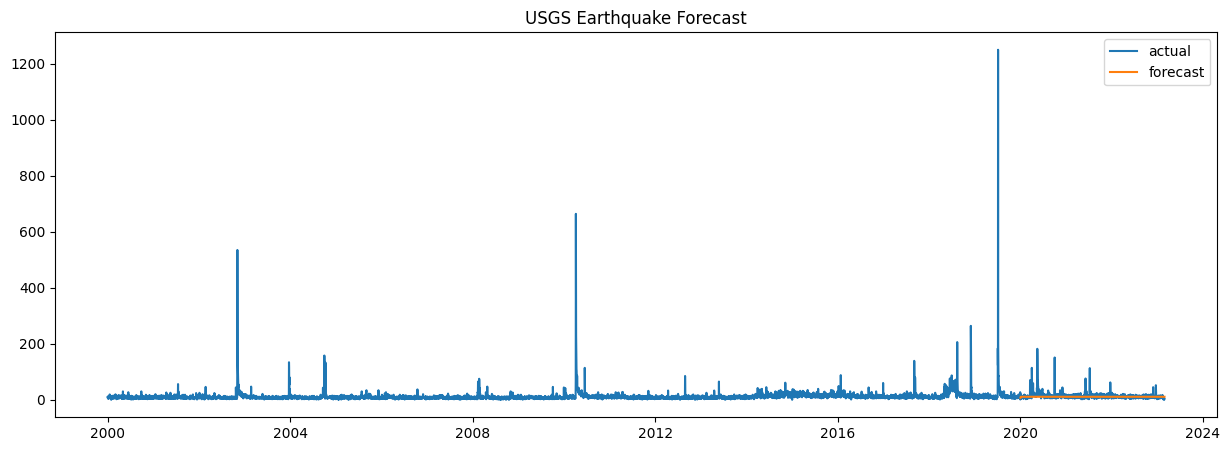

ARIMA(1, 1, 2) ,  RMSE=12.476


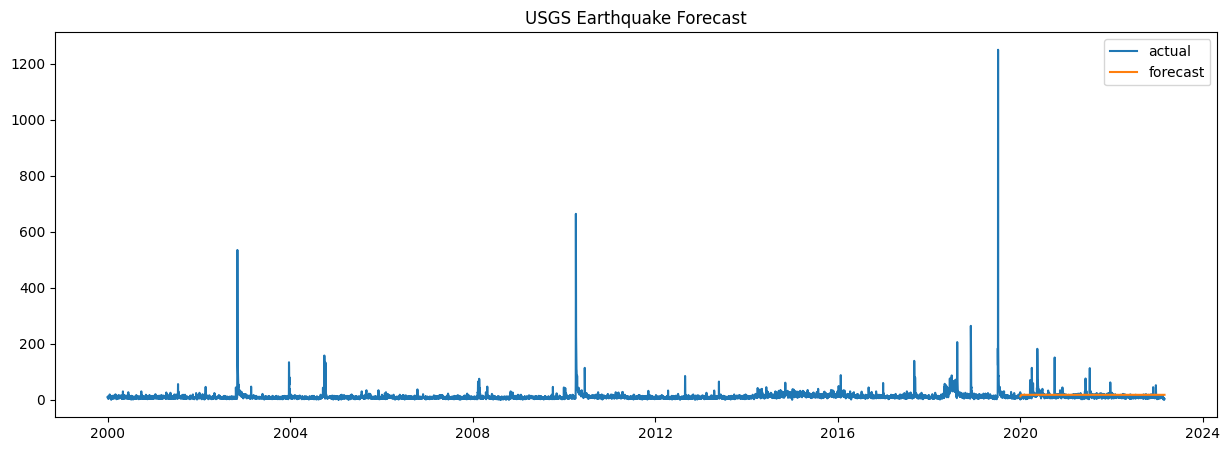

ARIMA(1, 2, 0) ,  RMSE=6115.451


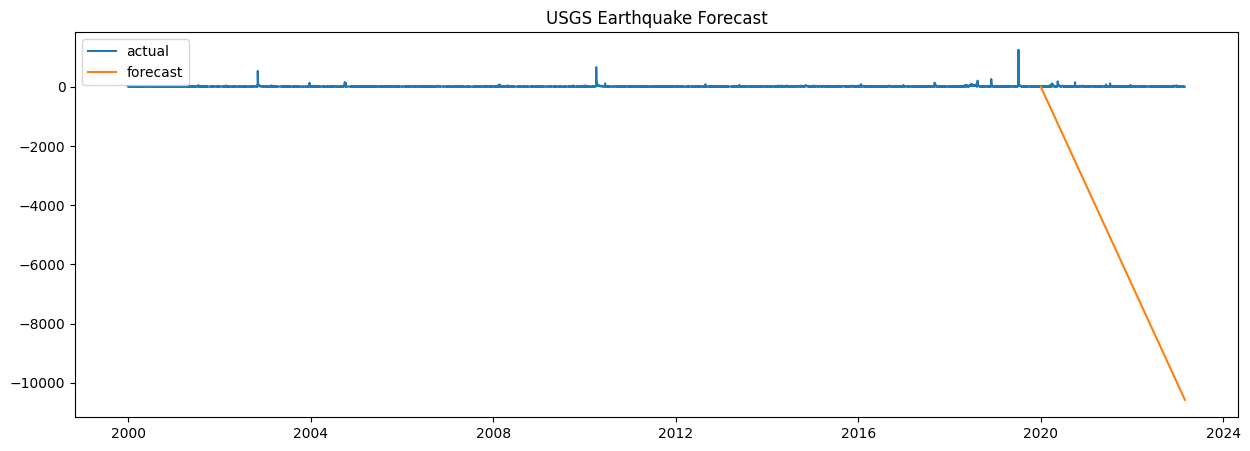

ARIMA(1, 2, 1) ,  RMSE=12.774


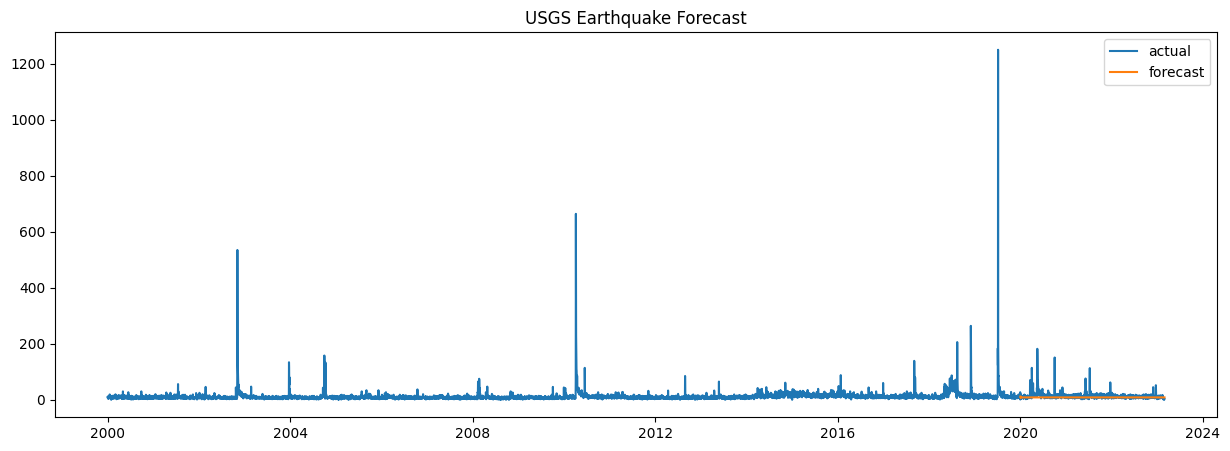

ARIMA(1, 2, 2) ,  RMSE=12.515


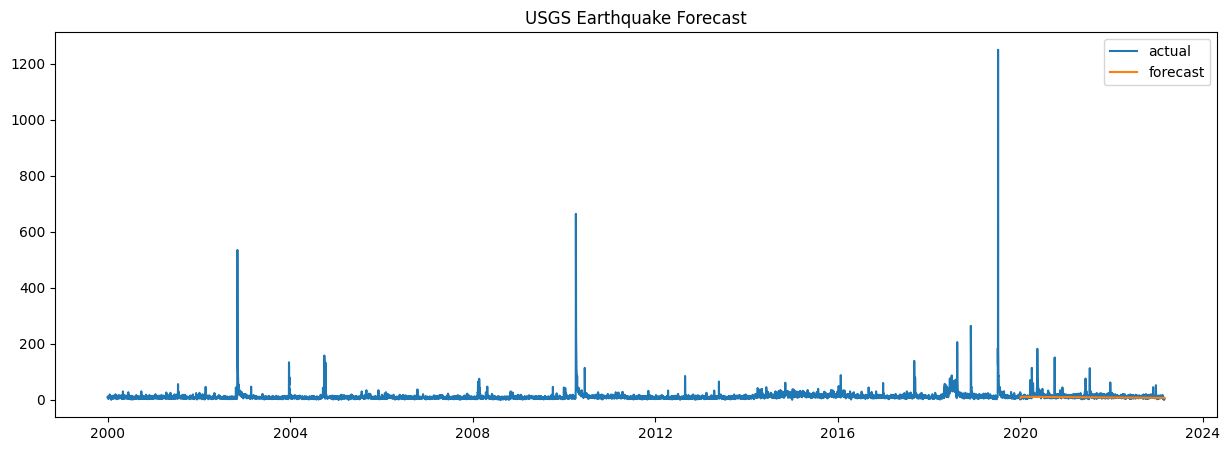

ARIMA(2, 0, 0) ,  RMSE=11.883


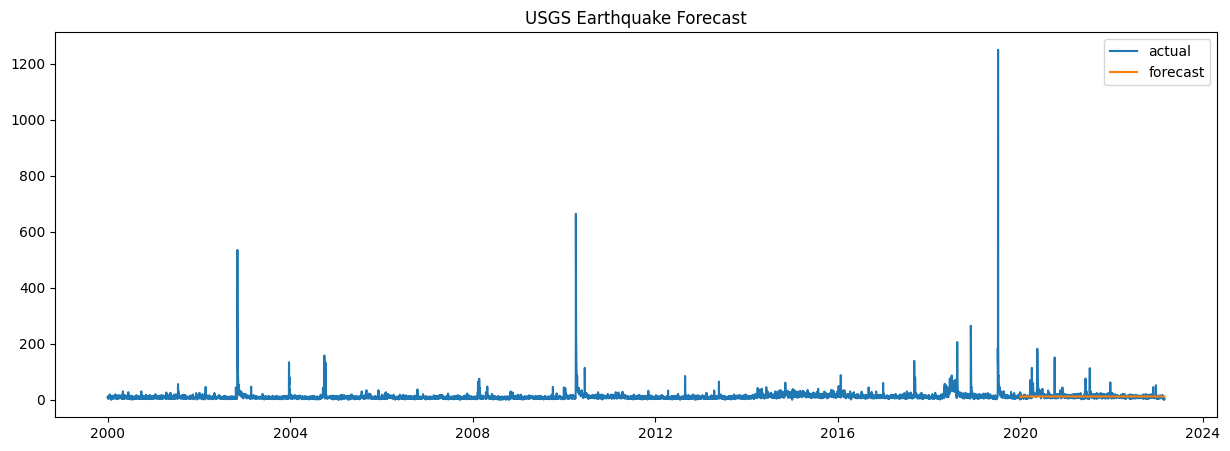

ARIMA(2, 0, 1) ,  RMSE=11.883


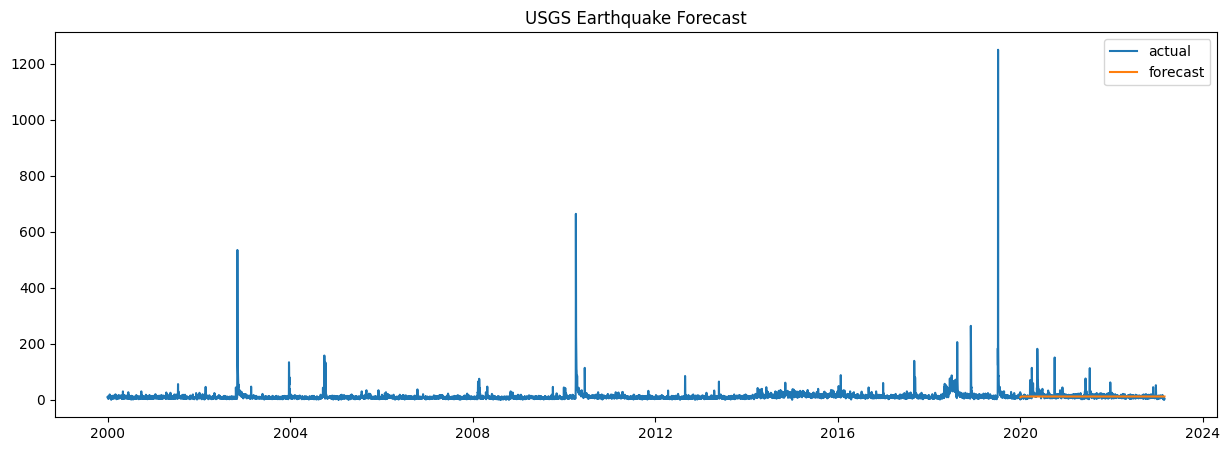

ARIMA(2, 0, 2) ,  RMSE=11.884


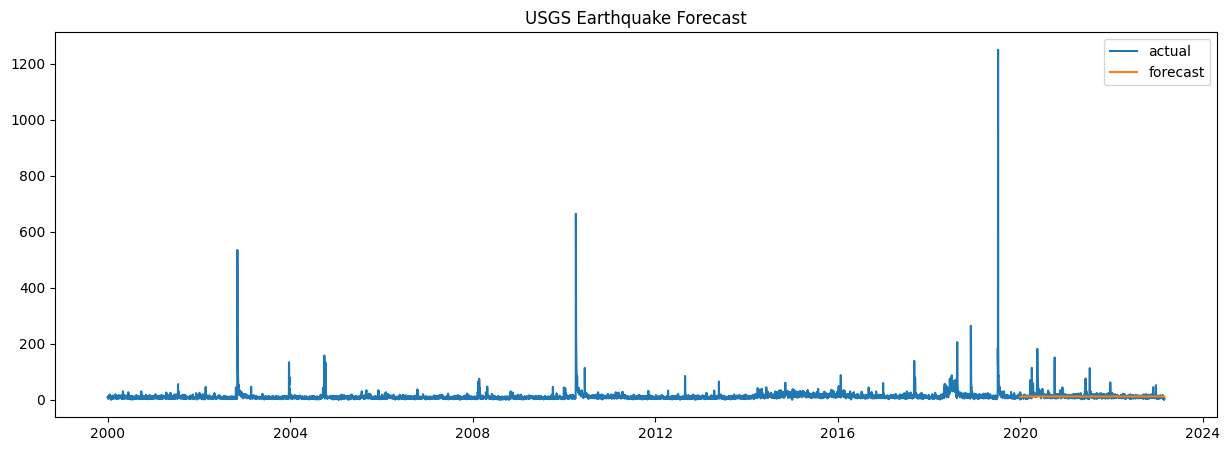

ARIMA(2, 1, 0) ,  RMSE=12.408


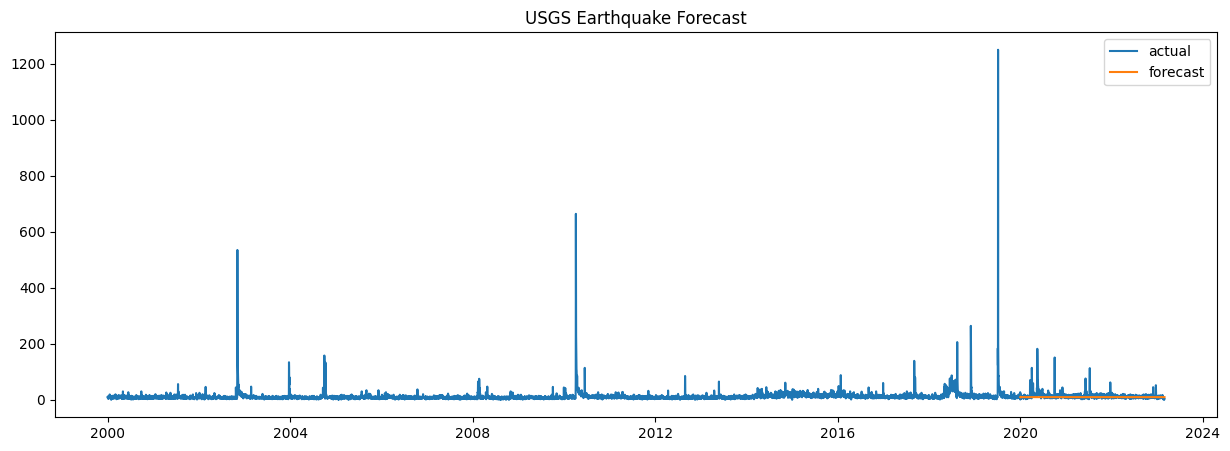

ARIMA(2, 1, 1) ,  RMSE=11.757


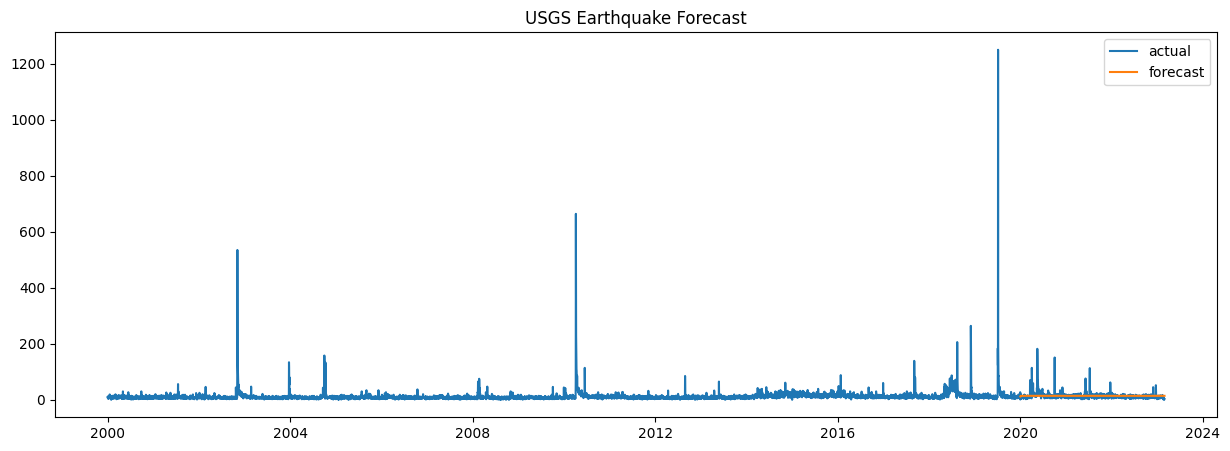

ARIMA(2, 1, 2) ,  RMSE=12.457


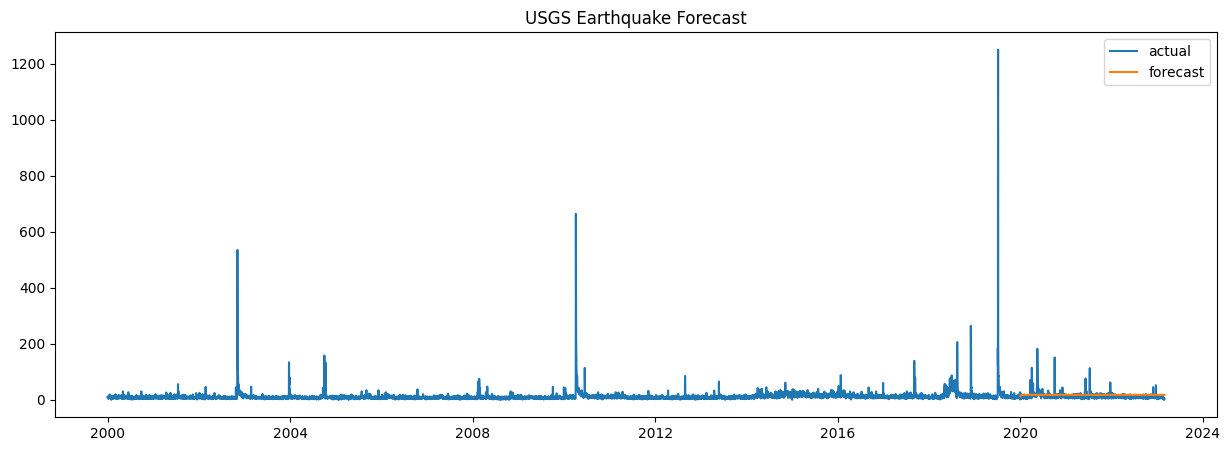

ARIMA(2, 2, 0) ,  RMSE=2732.268


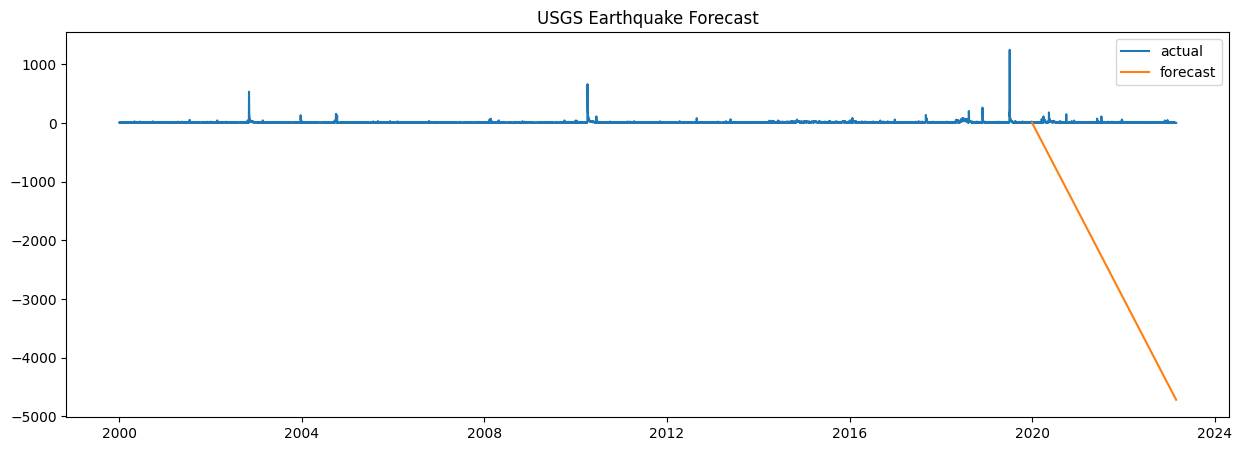

ARIMA(2, 2, 1) ,  RMSE=12.392


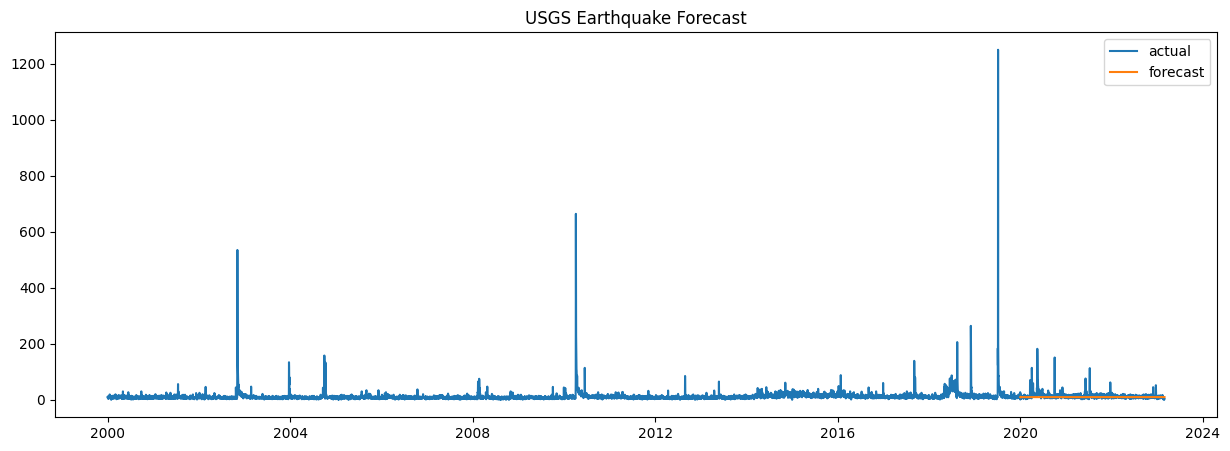

ARIMA(2, 2, 2) ,  RMSE=12.997


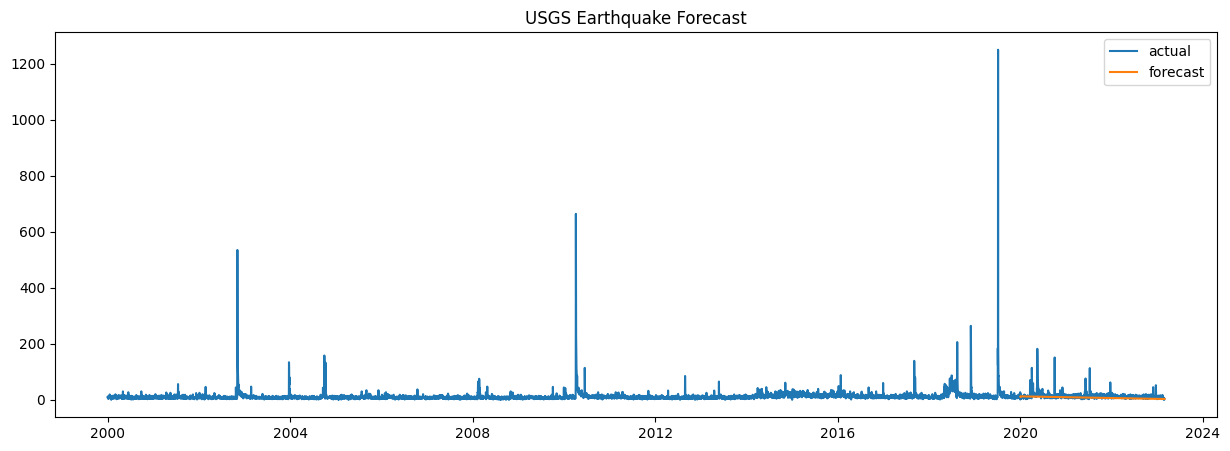

In [ ]:
p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 3)
scores = []

start_date = '2020-01-01'
end_date = '2023-02-27'
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = ARIMA(train, order=order).fit()
            predictions = model.predict(start=start_date, end=end_date, typ='levels')
            error = sqrt(mean_squared_error(test['Count'], predictions))
            print('ARIMA%s ,  RMSE=%.3f' % (order,error))
            scores.append((order, error))

            plt.figure(figsize=(15, 5))
            plt.plot(df_time, label='actual')
            plt.plot(predictions, label='forecast')
            plt.title('USGS Earthquake Forecast')
            plt.legend()
            plt.show()

# remove empty results
scores = [r for r in scores if r[1] != None]
# sort configs by error, asc
scores.sort(key=lambda tup: tup[1])

In [ ]:
scores

[((2, 1, 1), 11.75729990224893),
 ((2, 0, 0), 11.883023933150538),
 ((0, 0, 2), 11.883193580132655),
 ((1, 0, 1), 11.883299322302927),
 ((1, 0, 2), 11.883303633621363),
 ((2, 0, 1), 11.883366675256209),
 ((0, 0, 0), 11.883722063922438),
 ((2, 0, 2), 11.883826110081882),
 ((1, 0, 0), 11.88397178423163),
 ((0, 0, 1), 11.884863980724672),
 ((1, 1, 1), 12.067680665947433),
 ((0, 1, 2), 12.134800201818198),
 ((0, 1, 1), 12.161261454186553),
 ((0, 2, 2), 12.161499009665546),
 ((2, 2, 1), 12.391882150378123),
 ((2, 1, 0), 12.4081387952079),
 ((2, 1, 2), 12.456718910044307),
 ((1, 1, 2), 12.476311910785105),
 ((1, 2, 2), 12.515209630029062),
 ((1, 2, 1), 12.774401084716713),
 ((1, 1, 0), 12.779606901610608),
 ((2, 2, 2), 12.996566615866547),
 ((0, 1, 0), 17.147817946081606),
 ((0, 2, 1), 17.883604878195616),
 ((2, 2, 0), 2732.2678090538825),
 ((1, 2, 0), 6115.450937622468),
 ((0, 2, 0), 17343.762237178642)]

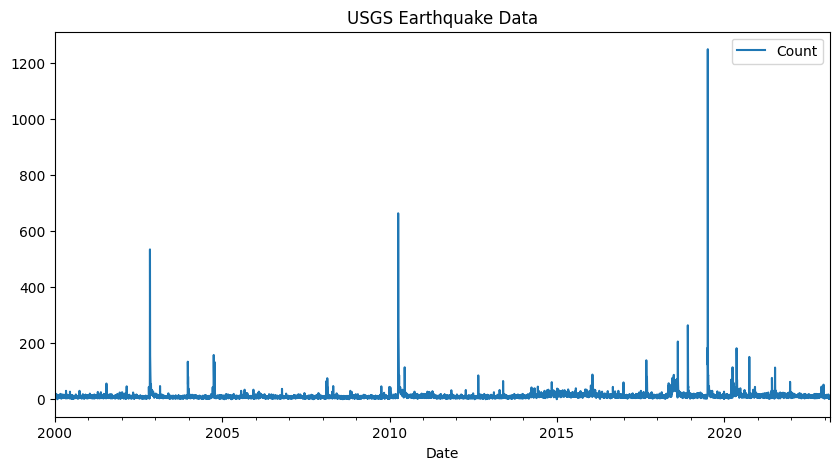

ADF Statistic: -20.840028
p-value: 0.000000


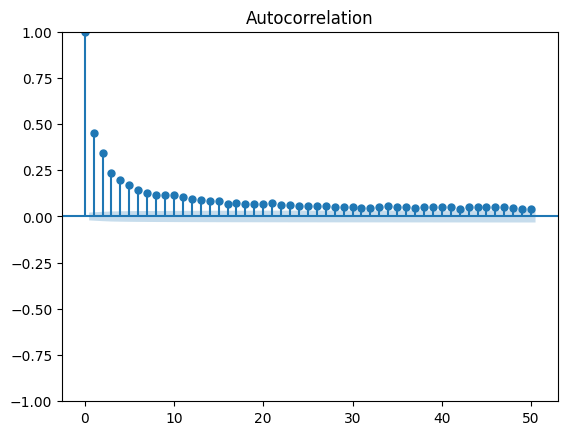

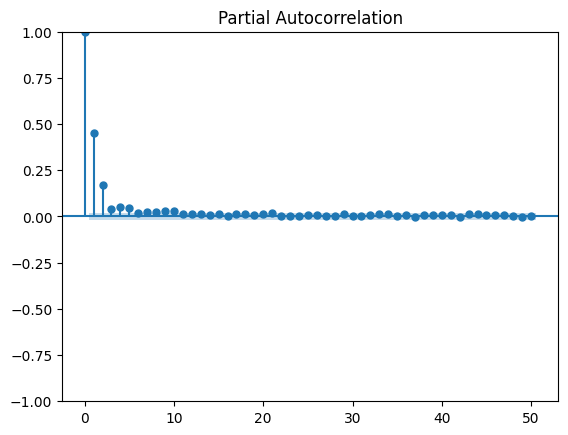

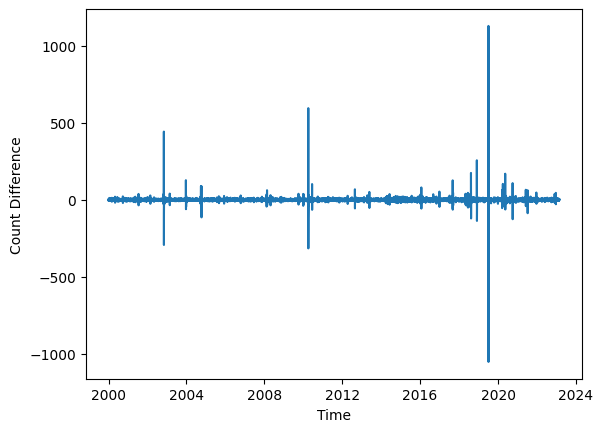

ADF Statistic: -23.747528


In [ ]:
# visualize data
df_time.plot(figsize=(10, 5))
plt.title('USGS Earthquake Data')
plt.show()

# # select ARIMA model order
# plot_acf(df_time)
# plot_pacf(df_time)
# plt.show()


# # Test for stationarity using the ADF test
result = adfuller(df_time)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot the ACF and PACF to choose the ARIMA parameters
plot_acf(df_time['Count'], lags=50)
plot_pacf(df_time['Count'], lags=50)
plt.show()

# # Difference the time series to make it stationary
diff = df_time['Count'].diff().dropna()

# Plot the differenced time series
plt.plot(diff)
plt.xlabel('Time')
plt.ylabel('Count Difference')
plt.show()

# Test for stationarity again using the ADF test
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
#print('p-value: %

In [ ]:
test.index.min(), test.index.max()

(Timestamp('2020-01-01 00:00:00', freq='D'),
 Timestamp('2023-02-27 00:00:00', freq='D'))

2020-01-01     7.120005
2020-01-02     9.387377
2020-01-03    10.227405
2020-01-04    10.538624
2020-01-05    10.653925
                ...    
2023-02-23    10.721784
2023-02-24    10.721784
2023-02-25    10.721784
2023-02-26    10.721784
2023-02-27    10.721784
Freq: D, Name: predicted_mean, Length: 1154, dtype: float64


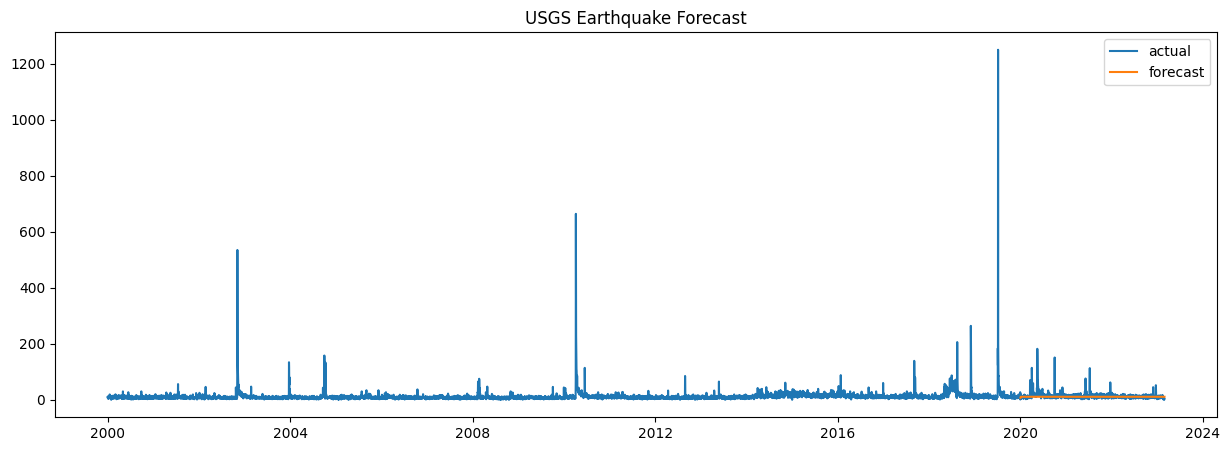

In [ ]:

# fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit =  model.fit()

start_date = '2020-01-01'
end_date = '2023-02-27'
forecast = model_fit.predict(start=start_date, end=end_date, typ='levels')
print(forecast)
# visualize forecast
plt.figure(figsize=(15, 5))
plt.plot(df_time, label='actual')
plt.plot(forecast, label='forecast')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [ ]:
forecast = pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
forecast = forecast.rename(columns={'index':'Date', 'predicted_mean':'predictions'})
forecast.head()

,Date,predictions
0,2020-01-01,7.120005
1,2020-01-02,9.387377
2,2020-01-03,10.227405
3,2020-01-04,10.538624
4,2020-01-05,10.653925


In [ ]:
test1 = test.reset_index()

In [ ]:
final = pd.merge(test1, forecast, on='Date')
final

,Date,Count,predictions
0,2020-01-01,12,7.120005
1,2020-01-02,7,9.387377
2,2020-01-03,11,10.227405
3,2020-01-04,6,10.538624
4,2020-01-05,12,10.653925
...,...,...,...
1149,2023-02-23,1,10.721784
1150,2023-02-24,2,10.721784
1151,2023-02-25,1,10.721784
1152,2023-02-26,1,10.721784


In [ ]:
print('RMSE :', sqrt(mean_squared_error(final['Count'], final['predictions'])))

RMSE : 12.067680665947433


In [ ]:
final.to_csv('predictions.csv', index = False)

## Exponential smoothing

In [ ]:
print(test.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27'],
              dtype='datetime64[ns]', name='Date', length=1154, freq='D')


 > Model params : ['add', 'add', 30, True] , RMSE : 12.24288


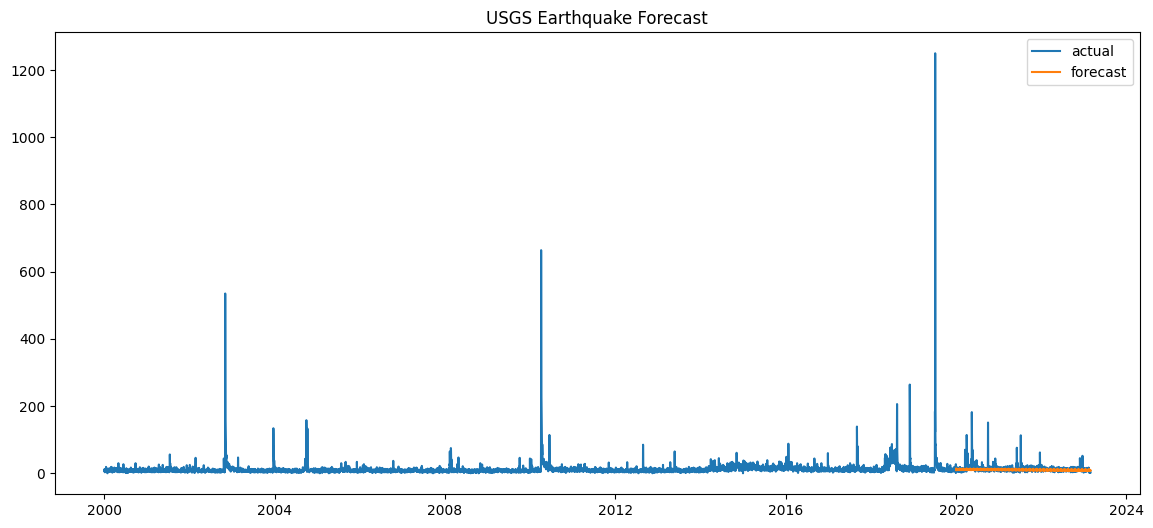

 > Model params : ['add', 'add', 30, False] , RMSE : 12.22408


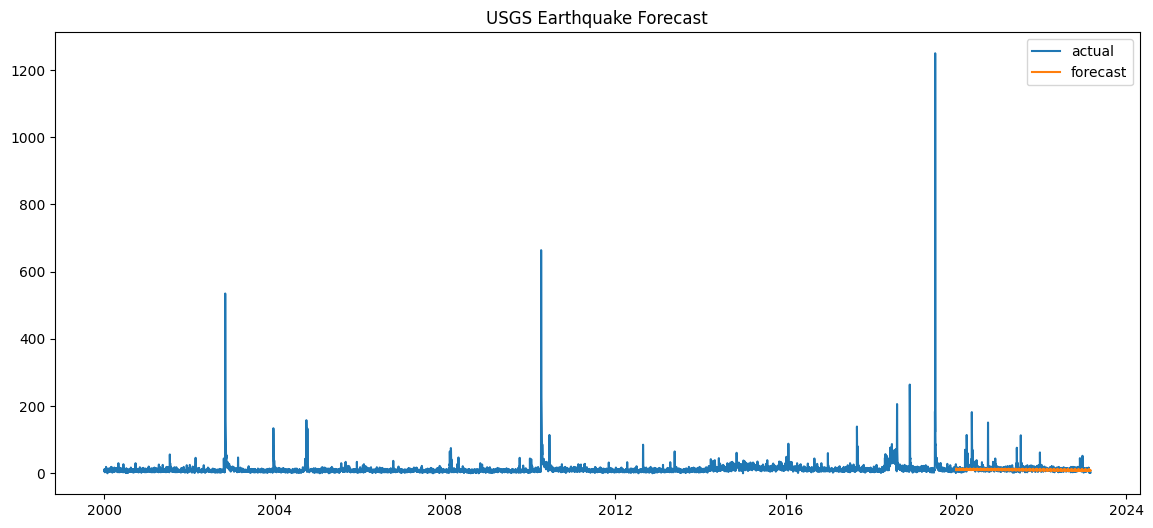

 > Model params : ['add', 'add', 60, True] , RMSE : 13.43924


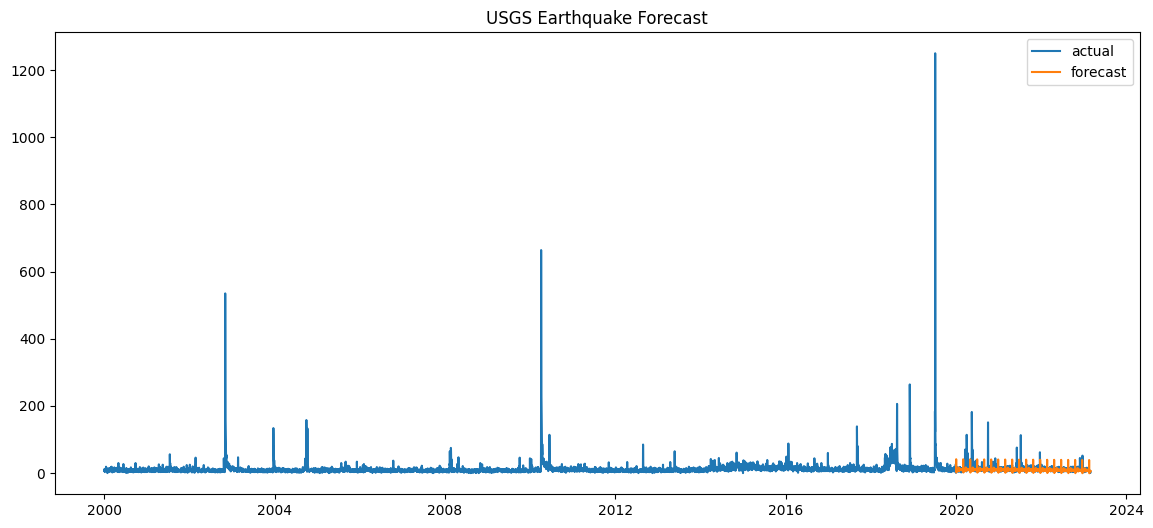

 > Model params : ['add', 'add', 60, False] , RMSE : 13.44234


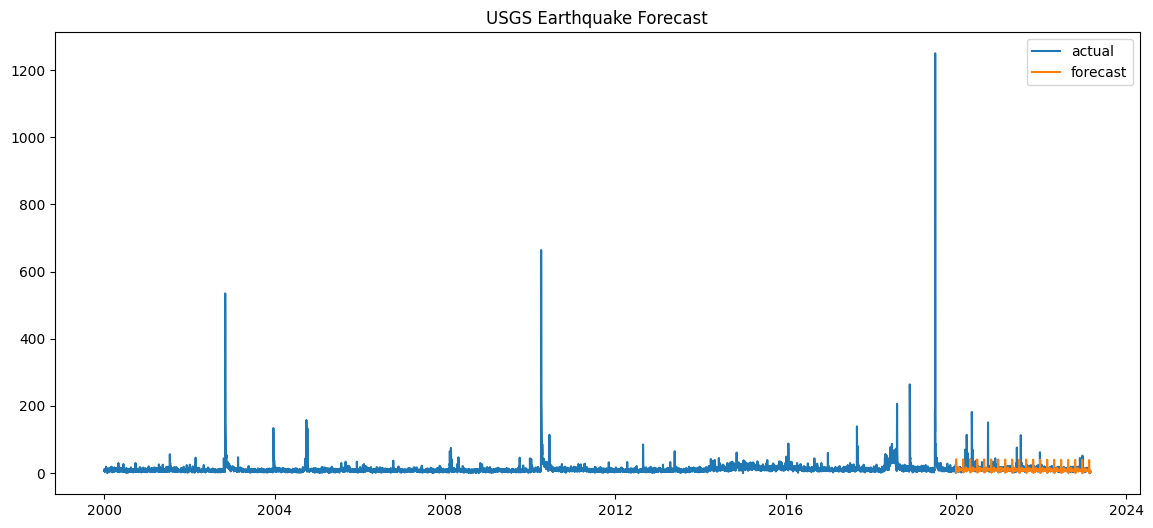

 > Model params : ['add', 'add', 180, True] , RMSE : 18.62957


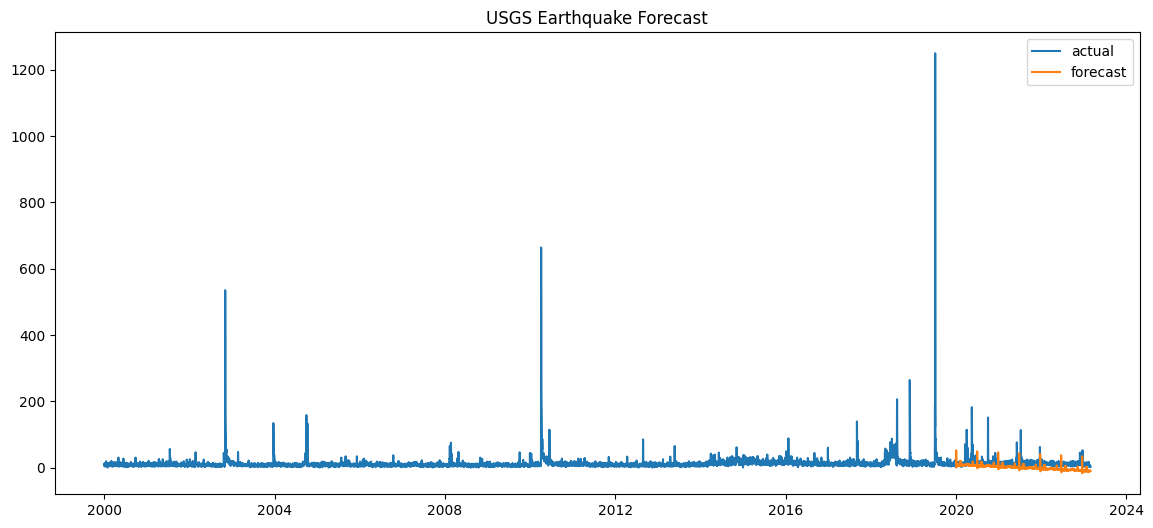

 > Model params : ['add', 'add', 180, False] , RMSE : 18.62837


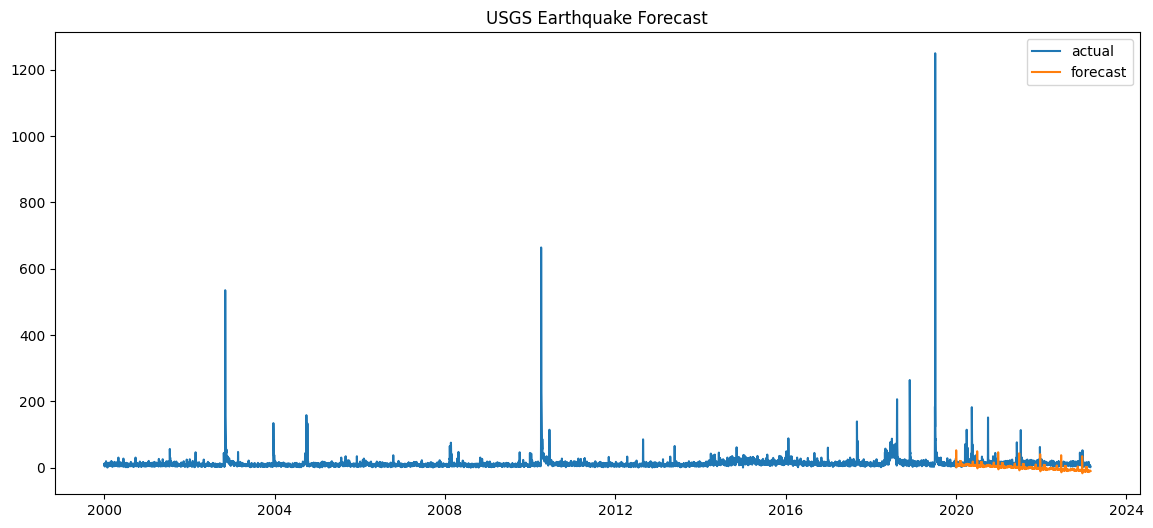

 > Model params : ['add', 'add', 365, True] , RMSE : 56.10410


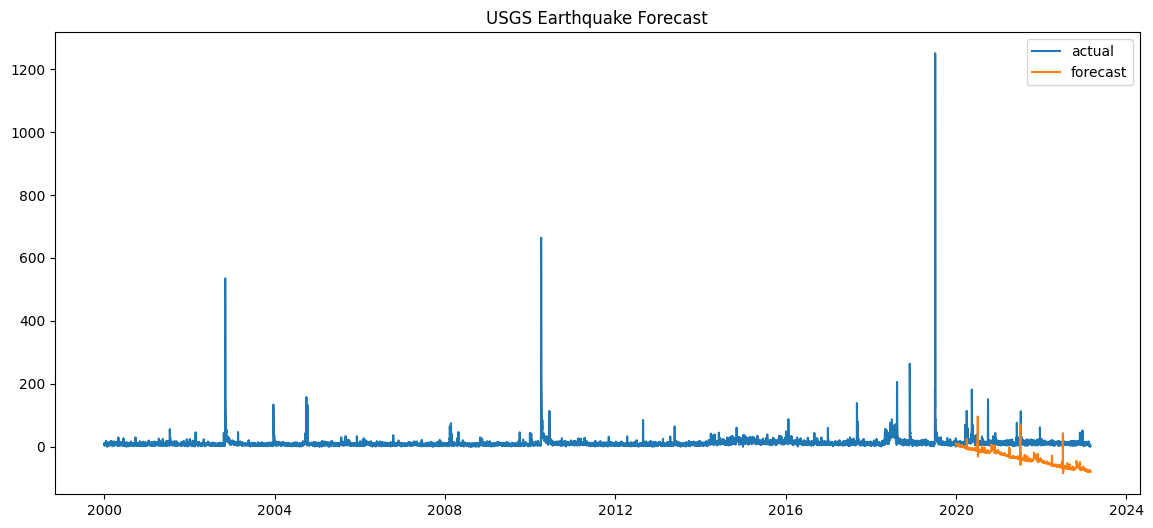

 > Model params : ['add', 'add', 365, False] , RMSE : 56.10696


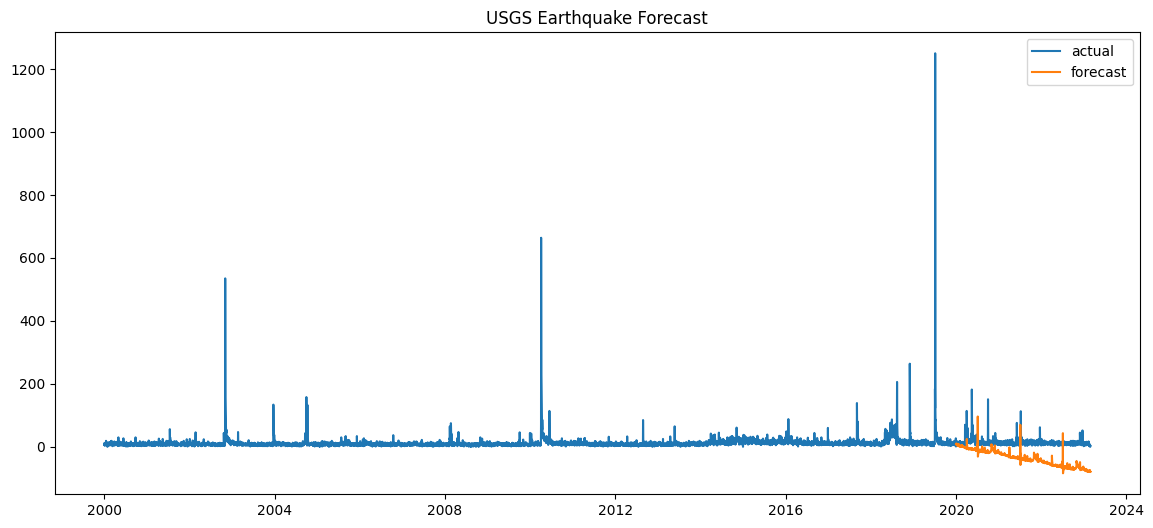

 > Model params : ['add', None, 30, True] , RMSE : 12.14647


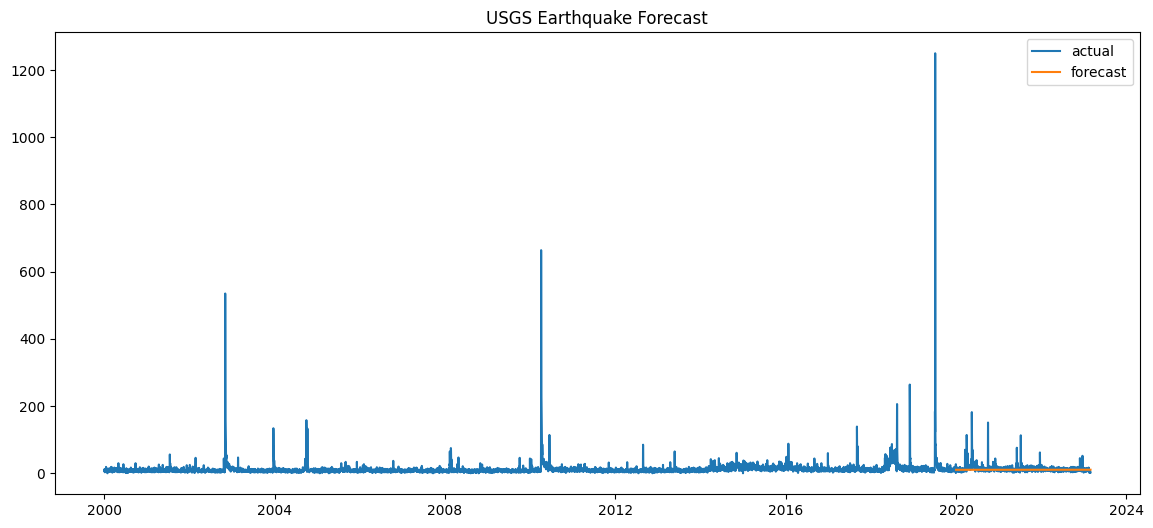

 > Model params : ['add', None, 30, False] , RMSE : 12.14634


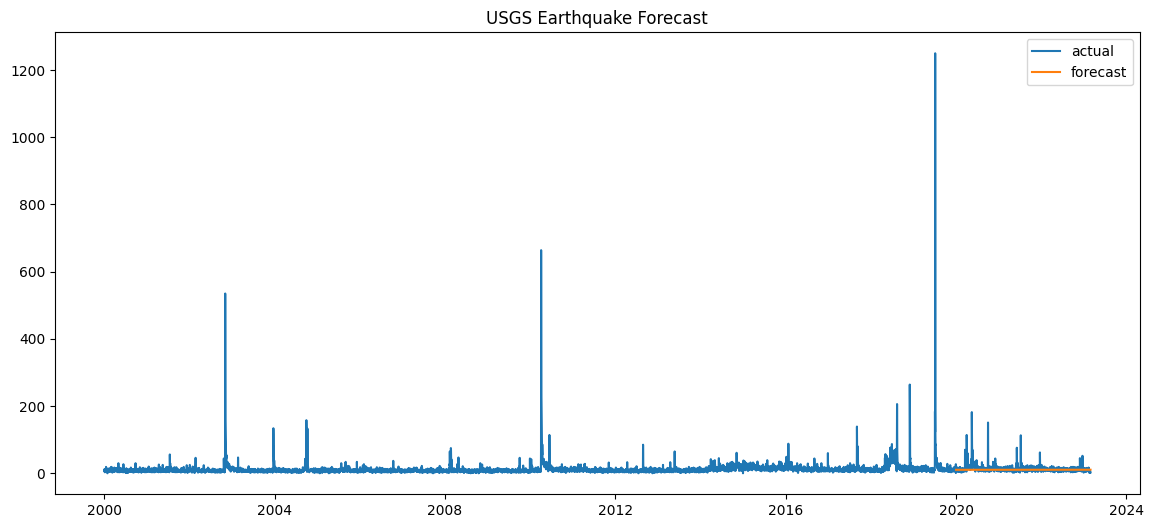

 > Model params : ['add', None, 60, True] , RMSE : 12.14647


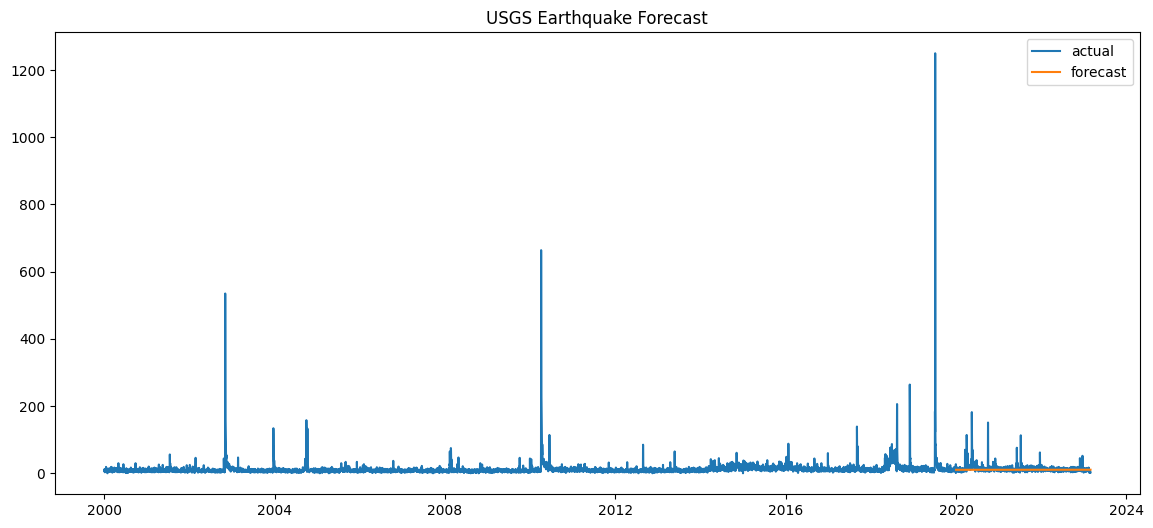

 > Model params : ['add', None, 60, False] , RMSE : 12.14634


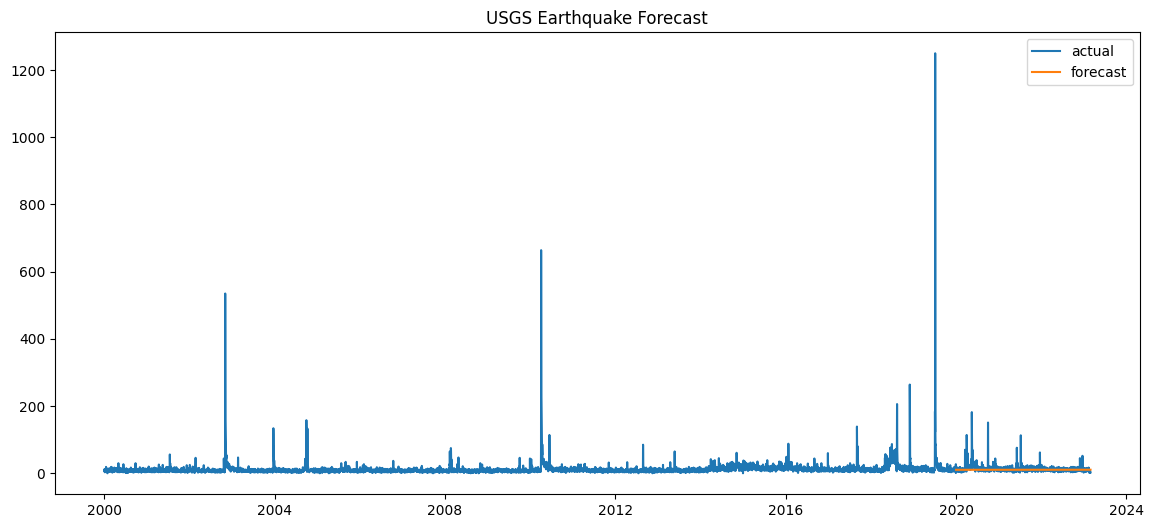

 > Model params : ['add', None, 180, True] , RMSE : 12.14647


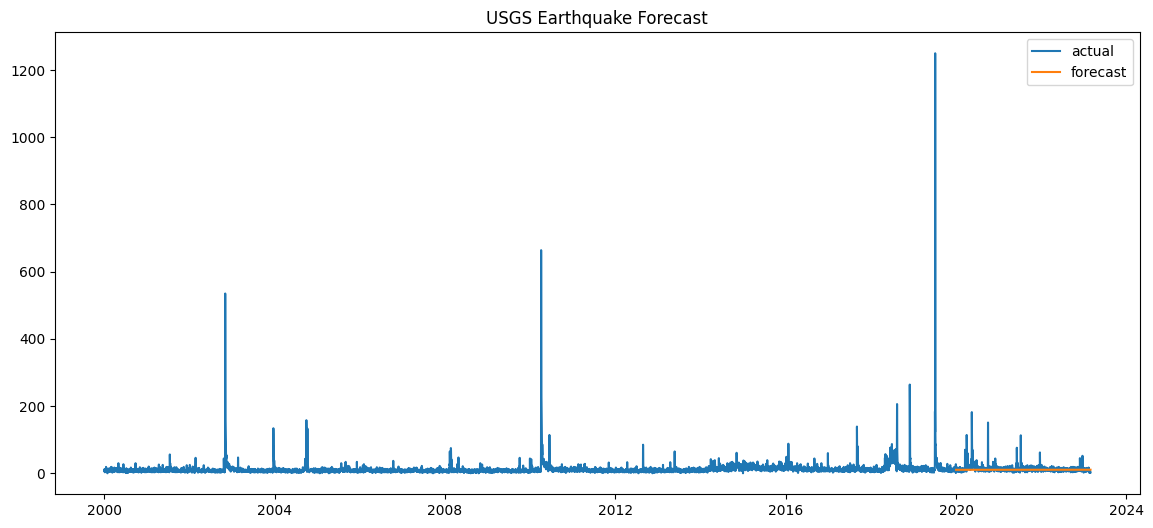

 > Model params : ['add', None, 180, False] , RMSE : 12.14634


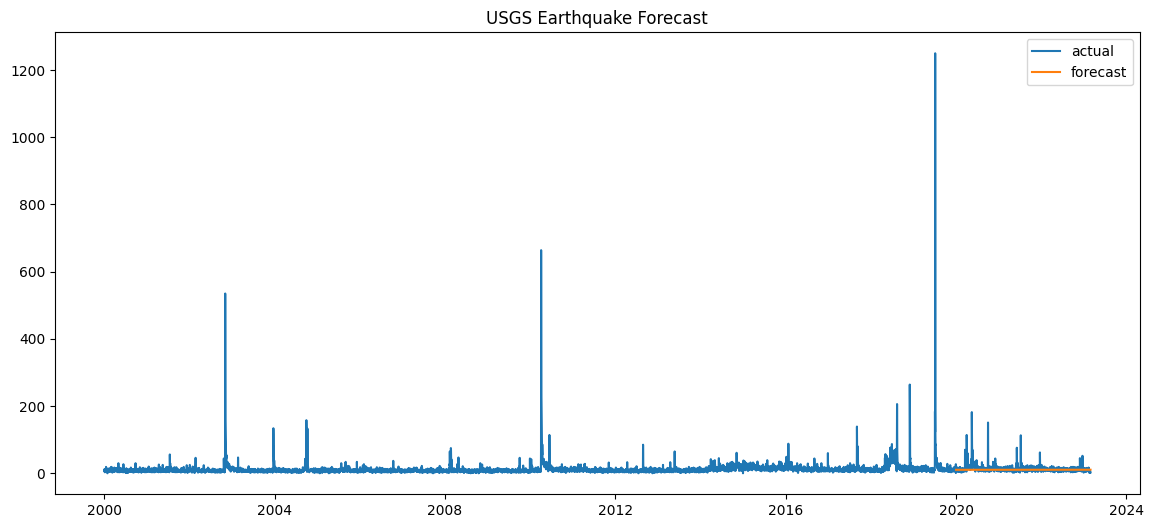

 > Model params : ['add', None, 365, True] , RMSE : 12.14647


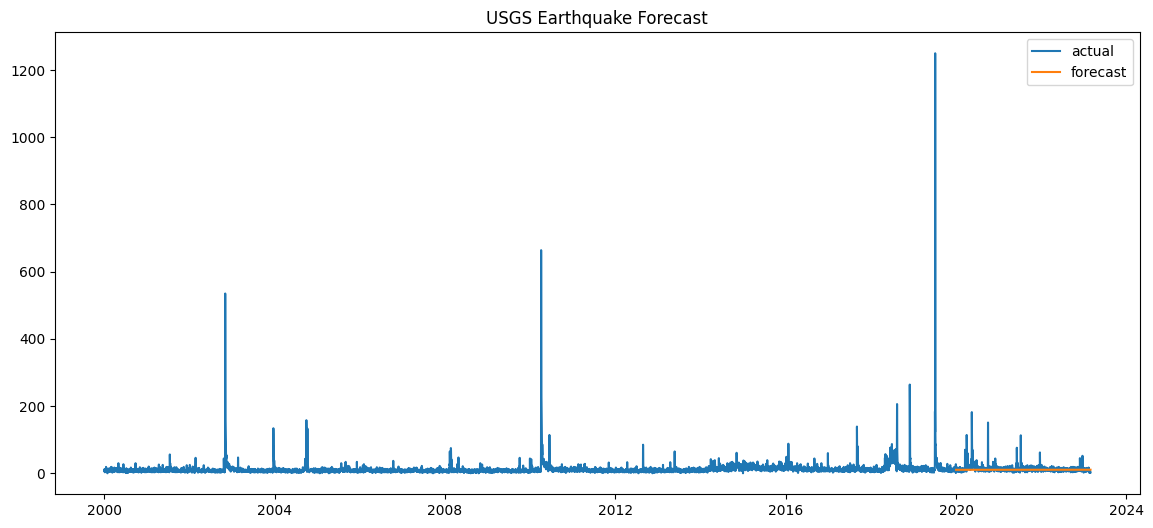

 > Model params : ['add', None, 365, False] , RMSE : 12.14634


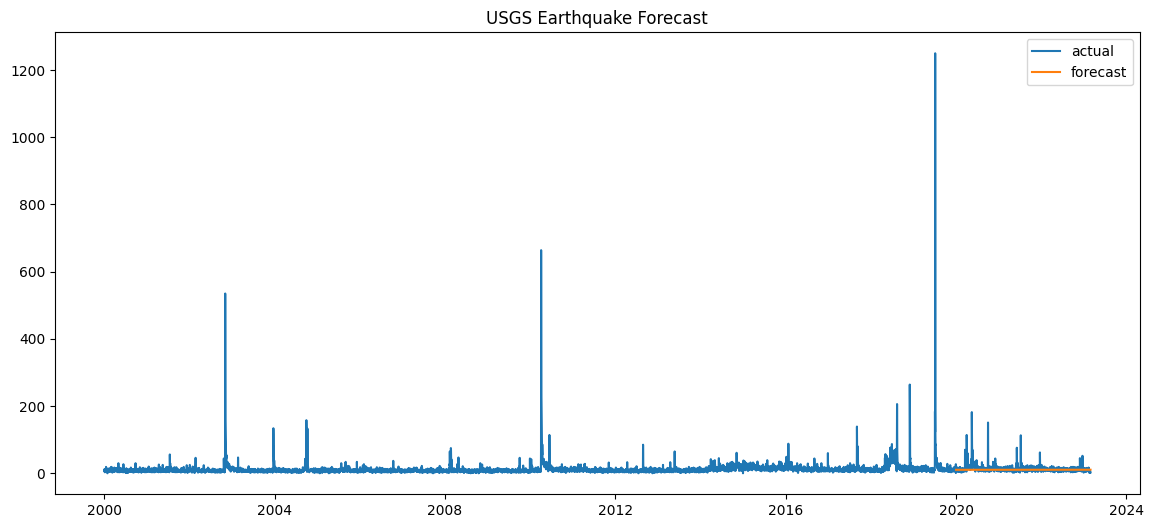

 > Model params : [None, 'add', 30, True] , RMSE : 12.69673


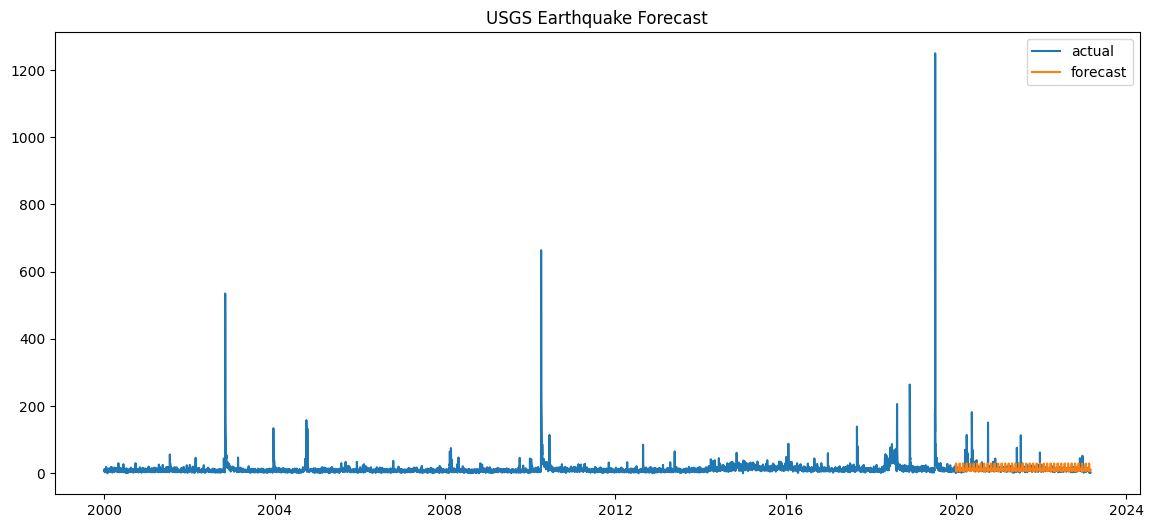

 > Model params : [None, 'add', 30, False] , RMSE : 12.69690


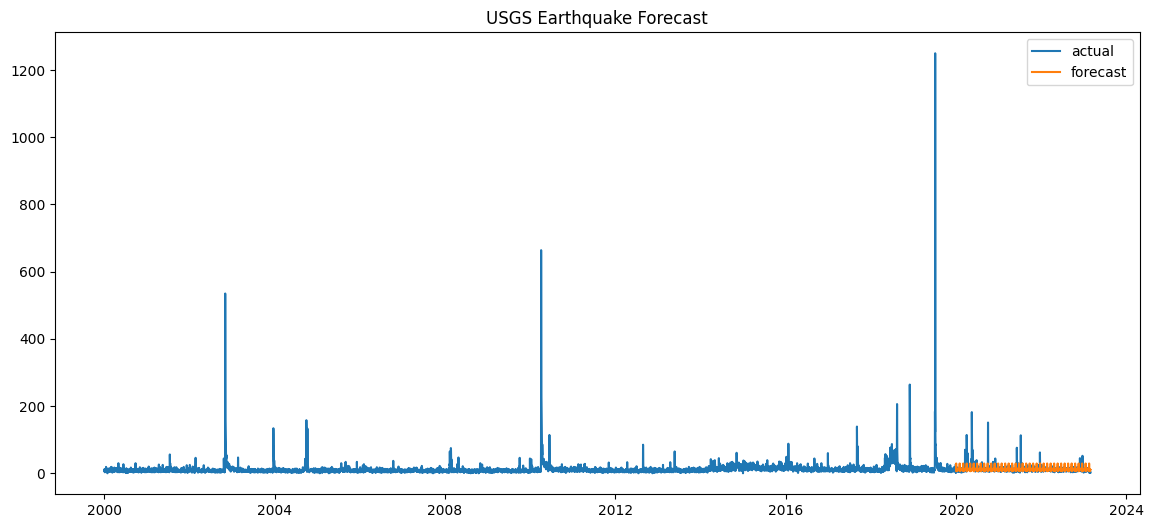

 > Model params : [None, 'add', 60, True] , RMSE : 12.87500


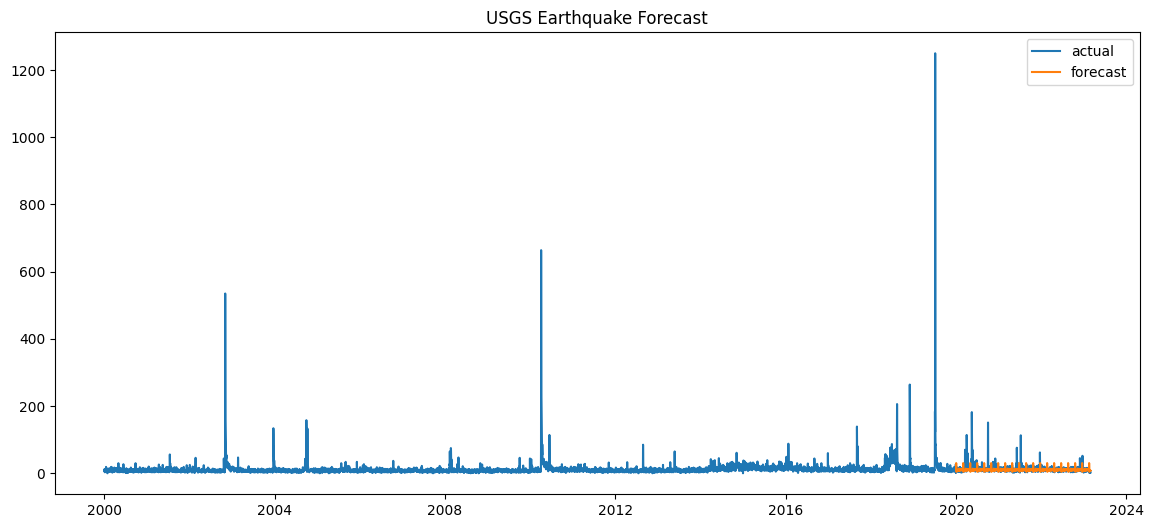

 > Model params : [None, 'add', 60, False] , RMSE : 12.87504


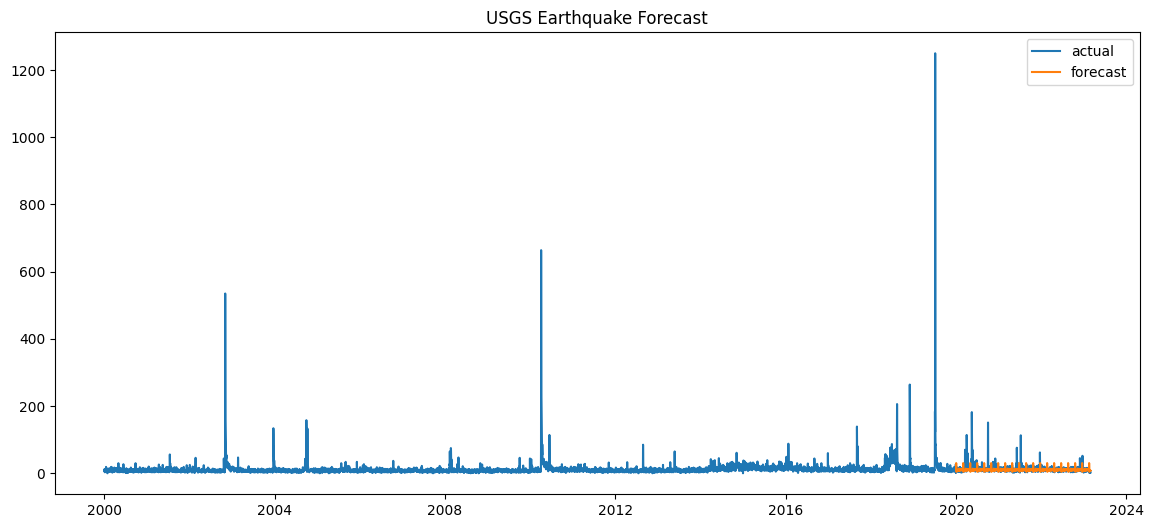

 > Model params : [None, 'add', 180, True] , RMSE : 12.56398


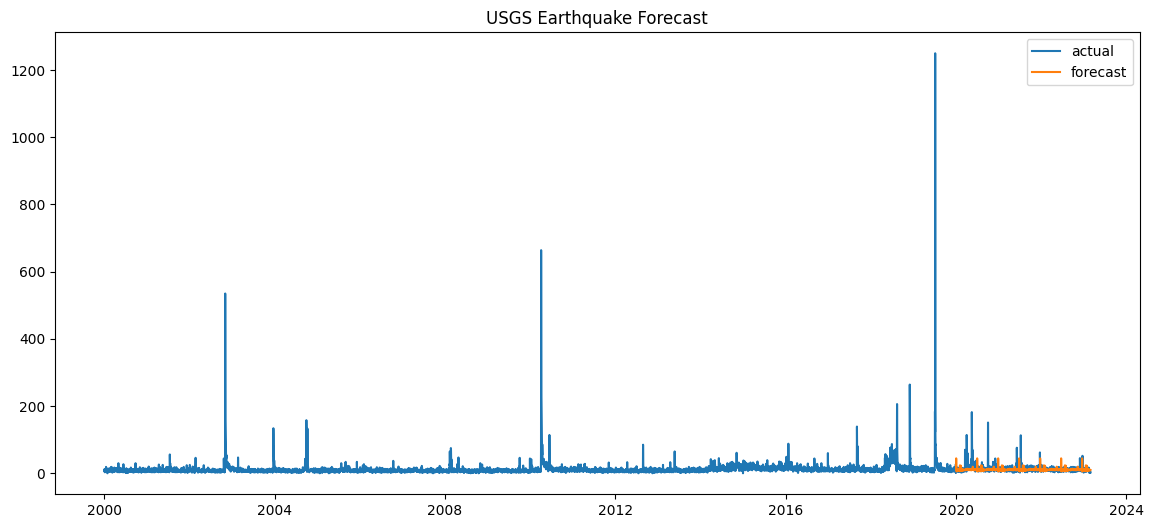

 > Model params : [None, 'add', 180, False] , RMSE : 12.56411


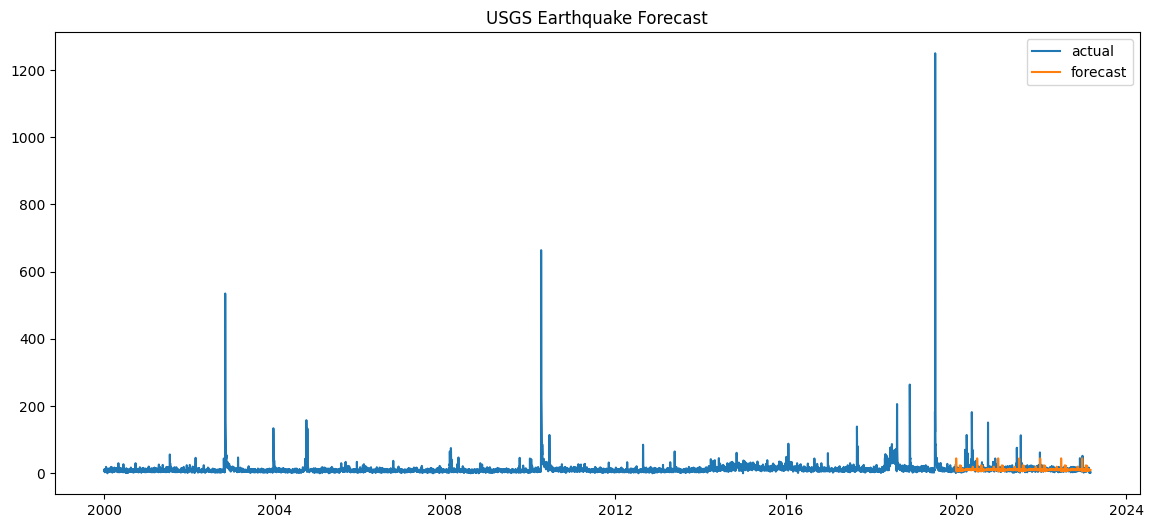

 > Model params : [None, 'add', 365, True] , RMSE : 17.99854


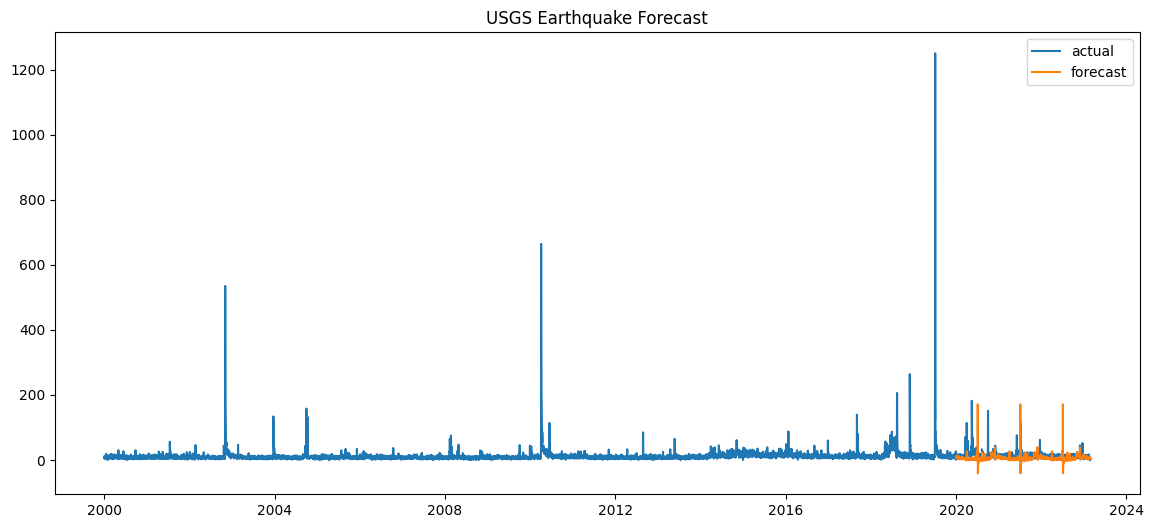

 > Model params : [None, 'add', 365, False] , RMSE : 17.99828


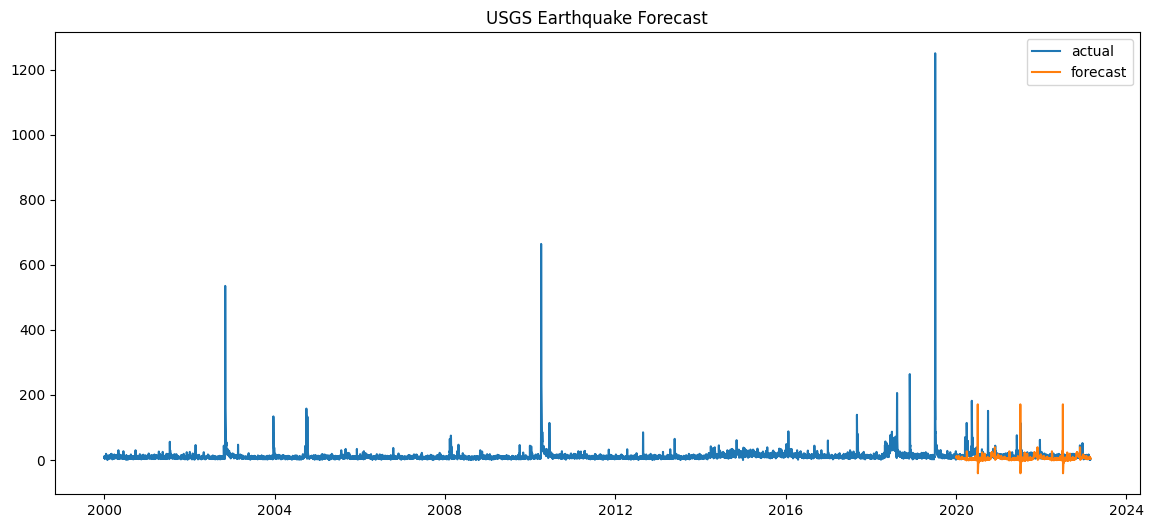

 > Model params : [None, None, 30, True] , RMSE : 12.16082


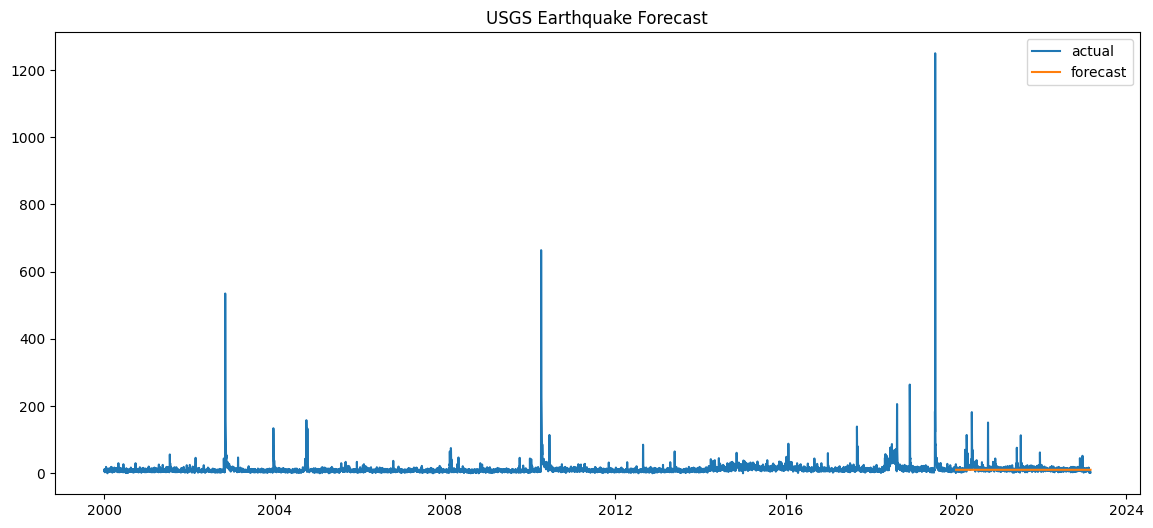

 > Model params : [None, None, 30, False] , RMSE : 12.16107


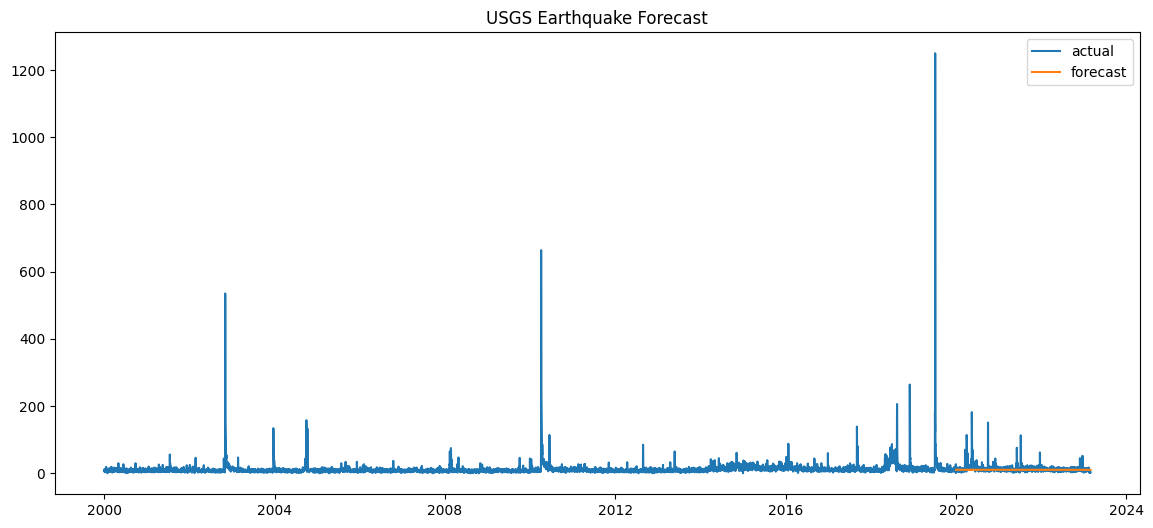

 > Model params : [None, None, 60, True] , RMSE : 12.16082


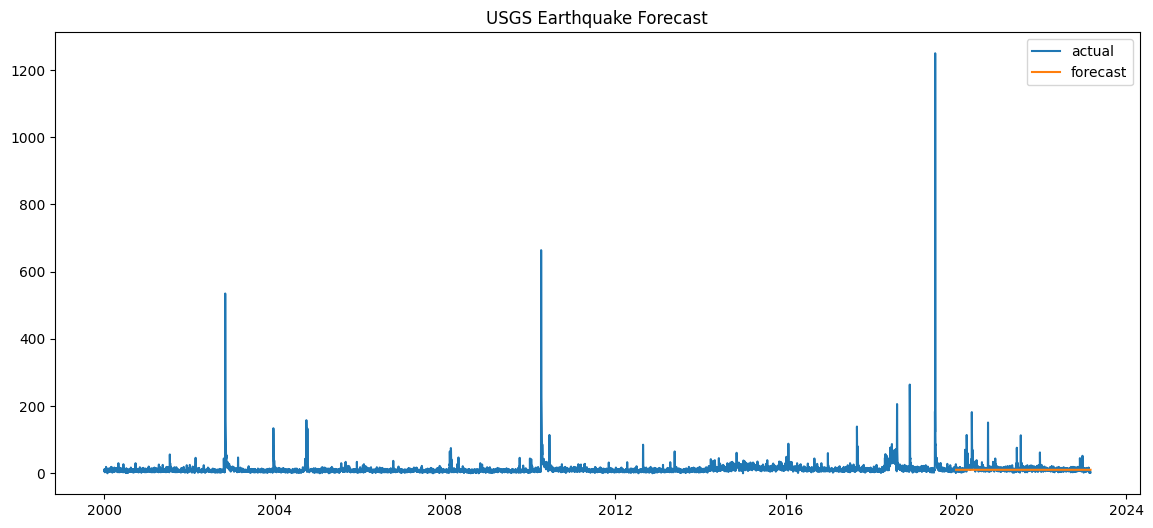

 > Model params : [None, None, 60, False] , RMSE : 12.16107


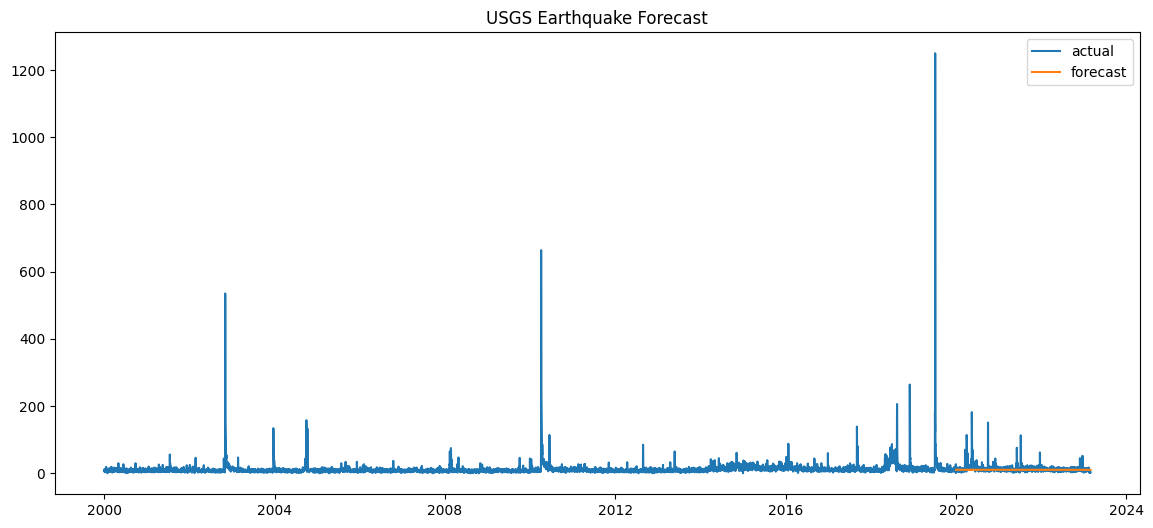

 > Model params : [None, None, 180, True] , RMSE : 12.16082


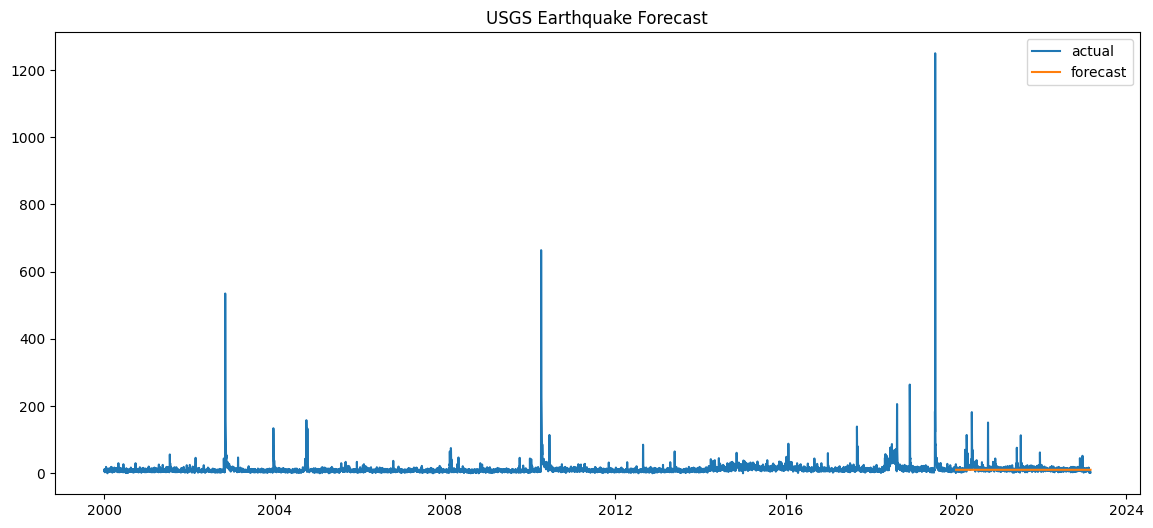

 > Model params : [None, None, 180, False] , RMSE : 12.16107


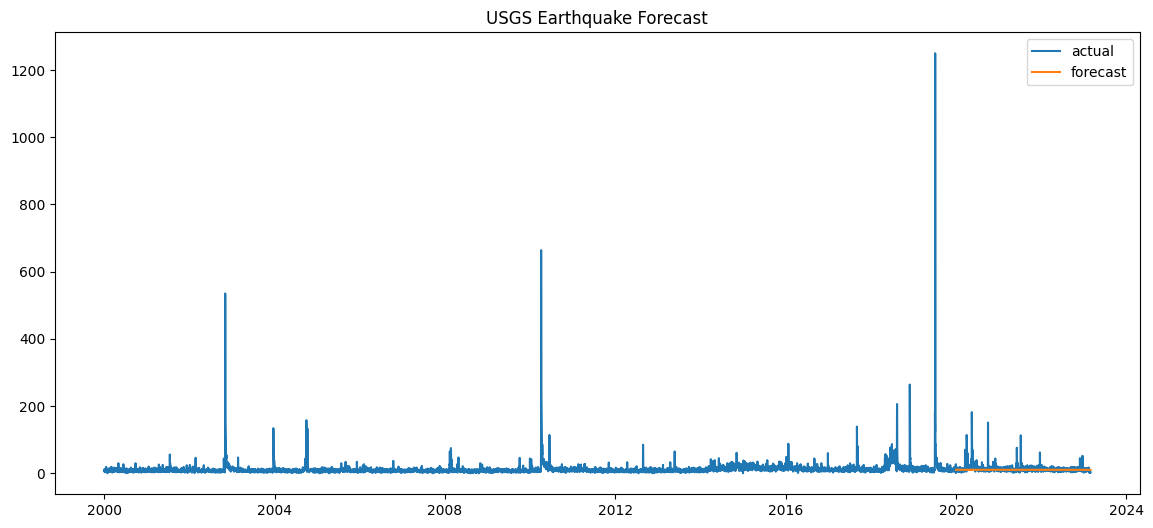

 > Model params : [None, None, 365, True] , RMSE : 12.16082


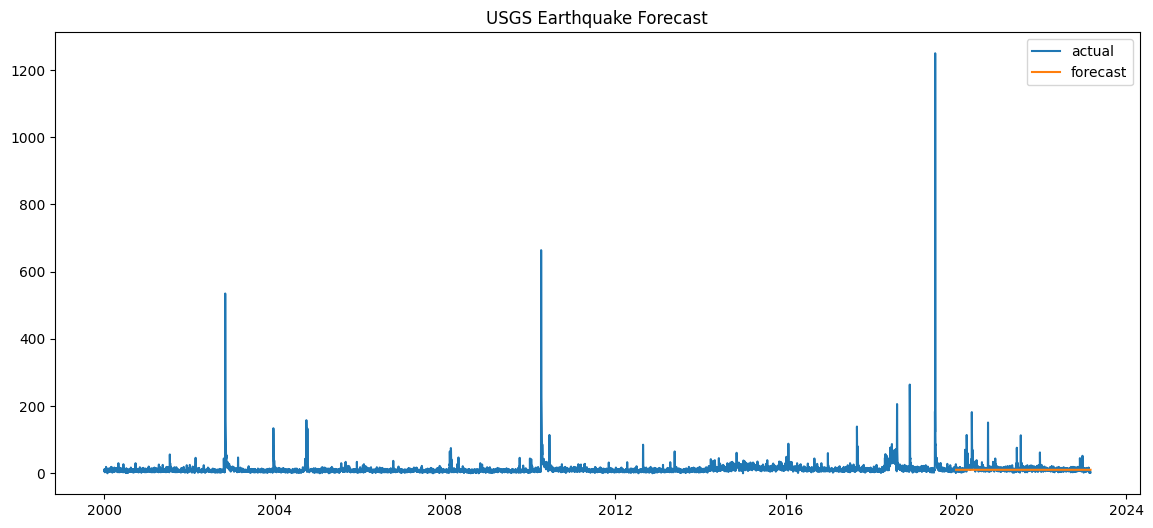

 > Model params : [None, None, 365, False] , RMSE : 12.16107


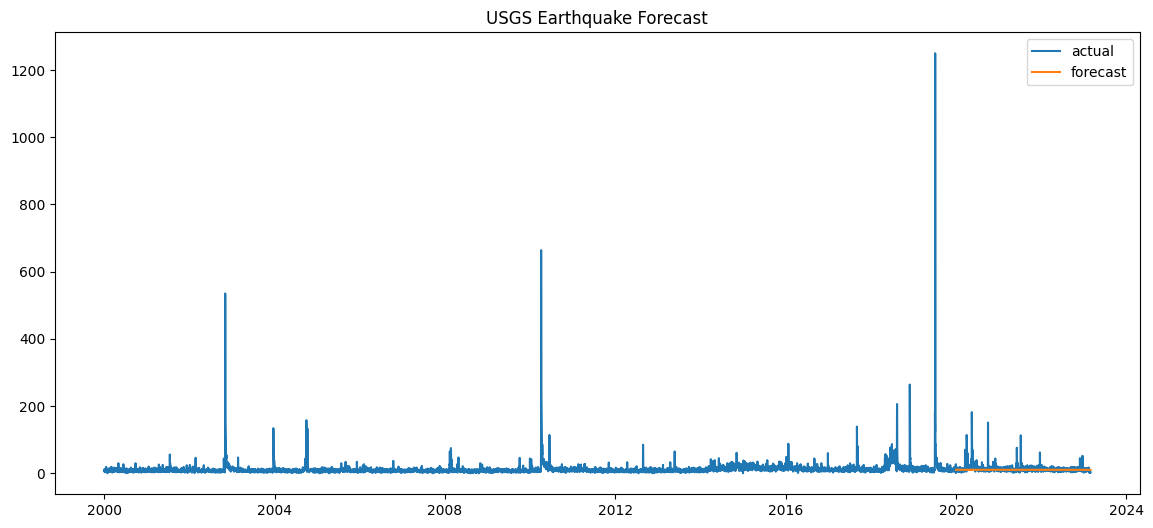

In [ ]:
start_date = '2020-01-01'
end_date = '2023-02-27'
training = df_time[df_time.index < '2020-01-01']
testing = df_time[df_time.index >= '2020-01-01']

def vis(forecast):
    # visualize forecast
    plt.figure(figsize=(14, 6))
    plt.plot(df_time, label='actual')
    plt.plot(forecast, label='forecast')
    plt.title('USGS Earthquake Forecast')
    plt.legend()
    plt.show()

def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', None]
    s_params = ['add', None]
    p_params = seasonal
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for s in s_params:
            for p in p_params:
                for r in r_params:
                    cfg = [t,s,p,r]
                    models.append(cfg)
    return models

def exp_smoothing_forecast(training, config, testing):
    t,s,p,r = config
    model = ExponentialSmoothing(training, trend=t, seasonal=s, seasonal_periods=p)
    # fit model
    model_fit = model.fit(optimized=True, remove_bias=r)
    # make one step forecast

    yhat = model_fit.predict(start=testing.index.min(), end=testing.index.max())
    return yhat

def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# walk-forward validation for univariate data
def walk_forward_validation(training, cfg, testing):
    predictions = exp_smoothing_forecast(training, cfg, testing)
    # estimate prediction error
    error = measure_rmse(testing['Count'], predictions)
    return error, predictions

def score_model(training, cfg, testing):
    result = None
    # convert config to a key
    key = str(cfg)
    result, predictions = walk_forward_validation(training, cfg, testing)
    if result is not None:
        print(' > Model params : %s , RMSE : %.5f' % (key, result))
        vis(predictions)
    return (key, result)



cfg_list = exp_smoothing_configs(seasonal=[30, 60, 180,365])
scores = [score_model(training, cfg, testing) for cfg in cfg_list]

# remove empty results
scores = [r for r in scores if r[1] != None]
# sort configs by error, asc
scores.sort(key=lambda tup: tup[1])

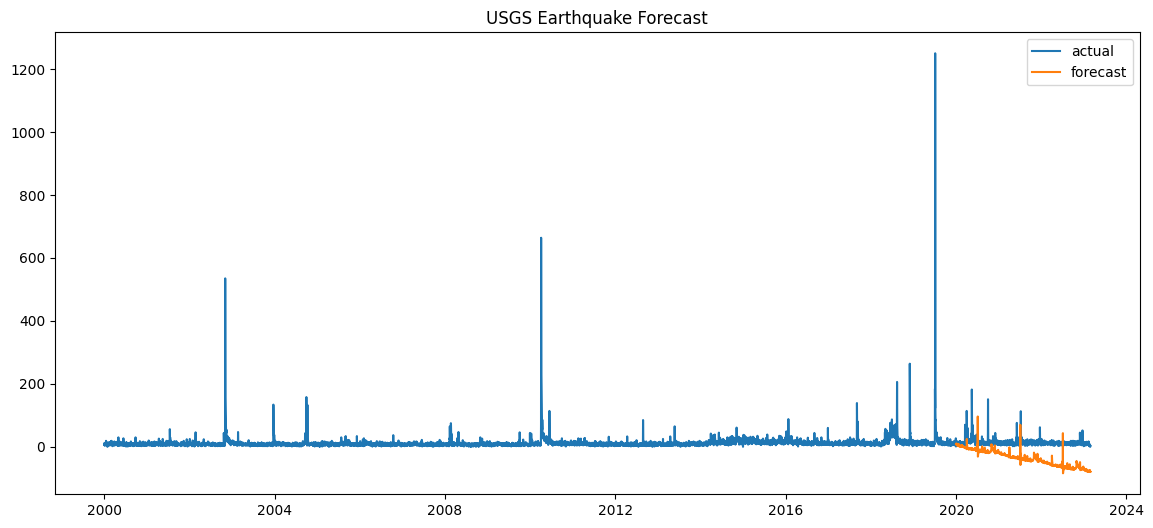

In [ ]:
# fit exponential smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

# make predictions
# start_date = '2023-04-01'
# end_date = '2028-12-31'

start_date = '2020-01-01'
end_date = '2023-02-27'
forecast = model_fit.predict(start=start_date, end=end_date)

# visualize forecast
plt.figure(figsize=(14, 6))
plt.plot(df_time, label='actual')
plt.plot(forecast, label='forecast')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [ ]:
forecast = pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
forecast = forecast.rename(columns={'index':'Date'})
test1 = test.reset_index()
final = pd.merge(test1, forecast, on='Date')
final = final.rename(columns={0:'predictions'})
final

,Date,Count,predictions
0,2020-01-01,12,8.979076
1,2020-01-02,7,10.050963
2,2020-01-03,11,9.293374
3,2020-01-04,6,6.365415
4,2020-01-05,12,7.660089
...,...,...,...
1149,2023-02-23,1,-79.549085
1150,2023-02-24,2,-80.191438
1151,2023-02-25,1,-78.378156
1152,2023-02-26,1,-79.995484


In [ ]:
print('RMSE :', sqrt(mean_squared_error(final['Count'], final['predictions'])))

RMSE : 56.10696496655155


In [ ]:
final.to_csv('Exponential_predictions.csv', index = False)

## LSTM

Epoch 1/20
101/101 - 32s - loss: 1.4491e-04 - 32s/epoch - 315ms/step
Epoch 2/20
101/101 - 15s - loss: 1.1813e-04 - 15s/epoch - 151ms/step
Epoch 3/20
101/101 - 15s - loss: 1.1157e-04 - 15s/epoch - 152ms/step
Epoch 4/20
101/101 - 15s - loss: 1.1213e-04 - 15s/epoch - 151ms/step
Epoch 5/20
101/101 - 15s - loss: 1.0378e-04 - 15s/epoch - 152ms/step
Epoch 6/20
101/101 - 17s - loss: 1.0085e-04 - 17s/epoch - 170ms/step
Epoch 7/20
101/101 - 16s - loss: 1.0021e-04 - 16s/epoch - 155ms/step
Epoch 8/20
101/101 - 15s - loss: 9.7695e-05 - 15s/epoch - 152ms/step
Epoch 9/20
101/101 - 15s - loss: 9.6771e-05 - 15s/epoch - 151ms/step
Epoch 10/20
101/101 - 15s - loss: 9.4743e-05 - 15s/epoch - 152ms/step
Epoch 11/20
101/101 - 15s - loss: 9.5226e-05 - 15s/epoch - 151ms/step
Epoch 12/20
101/101 - 15s - loss: 9.4374e-05 - 15s/epoch - 151ms/step
Epoch 13/20
101/101 - 16s - loss: 9.4231e-05 - 16s/epoch - 162ms/step
Epoch 14/20
101/101 - 15s - loss: 9.3625e-05 - 15s/epoch - 153ms/step
Epoch 15/20
101/101 - 15s - l

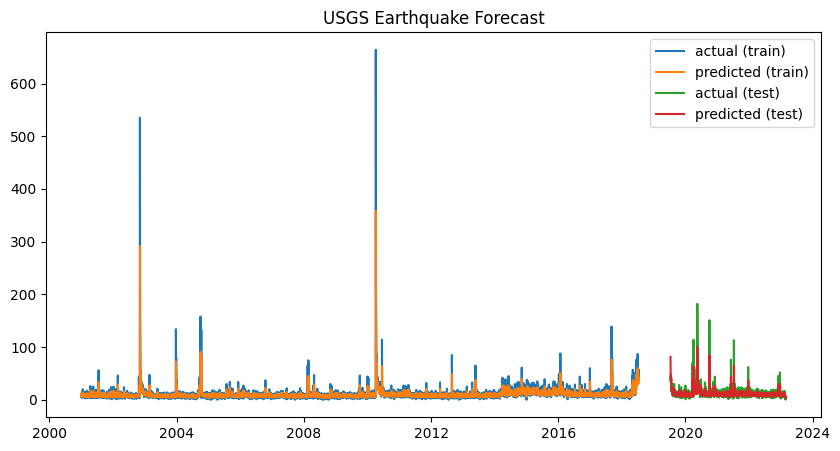

In [ ]:
# normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_time)

# split data into train and test sets
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

# create time series data for LSTM
def create_timeseries_data(data, lookback):
    X, y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback), 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

lookback = 365
train_X, train_y = create_timeseries_data(train, lookback)
test_X, test_y = create_timeseries_data(test, lookback)

# reshape input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit LSTM model
model.fit(train_X, train_y, epochs=20, batch_size=64, verbose=2)

# make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# invert scaling
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# visualize forecast
plt.figure(figsize=(10, 5))
plt.plot(df_time.index[lookback+1:train_size], train_y.flatten(), label='actual (train)')
plt.plot(df_time.index[lookback+1:train_size], train_predict.flatten(), label='predicted (train)')
plt.plot(df_time.index[train_size+lookback+1:], test_y.flatten(), label='actual (test)')
plt.plot(df_time.index[train_size+lookback+1:], test_predict.flatten(), label='predicted (test)')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len( test_y.flatten()), len(test_predict)

(1326, 1326)

In [ ]:
print('RMSE :', sqrt(mean_squared_error( test_y.flatten(), test_predict)))

RMSE : 9.747885379812852
